In [2]:
# Debug Nov. 10th, 2020: the new version of statannot automatically applies bonferroni correction. To obtain original result, need to add parameter comparisons_correction=None 

In [3]:
import numpy as np
import pandas as pd
from scipy import stats

In [4]:
df = pd.read_excel('../results/mouse.celltype-specific_genes/protein-coding_w_dNdS/phastCons/phastcons-celltype.xlsx')

In [5]:
df[df['Celltype']=='Neuron']['Avg_phastCons'].values

array([0.193231 , 0.0902024, 0.109885 , ..., 0.0635934, 0.0711811,
       0.0388862])

### Check whether phastCons are normally distributed

In [18]:
import matplotlib

In [19]:
import matplotlib.pyplot as plt

In [20]:
import seaborn as sns

In [21]:
matplotlib.rcParams['figure.dpi']= 300

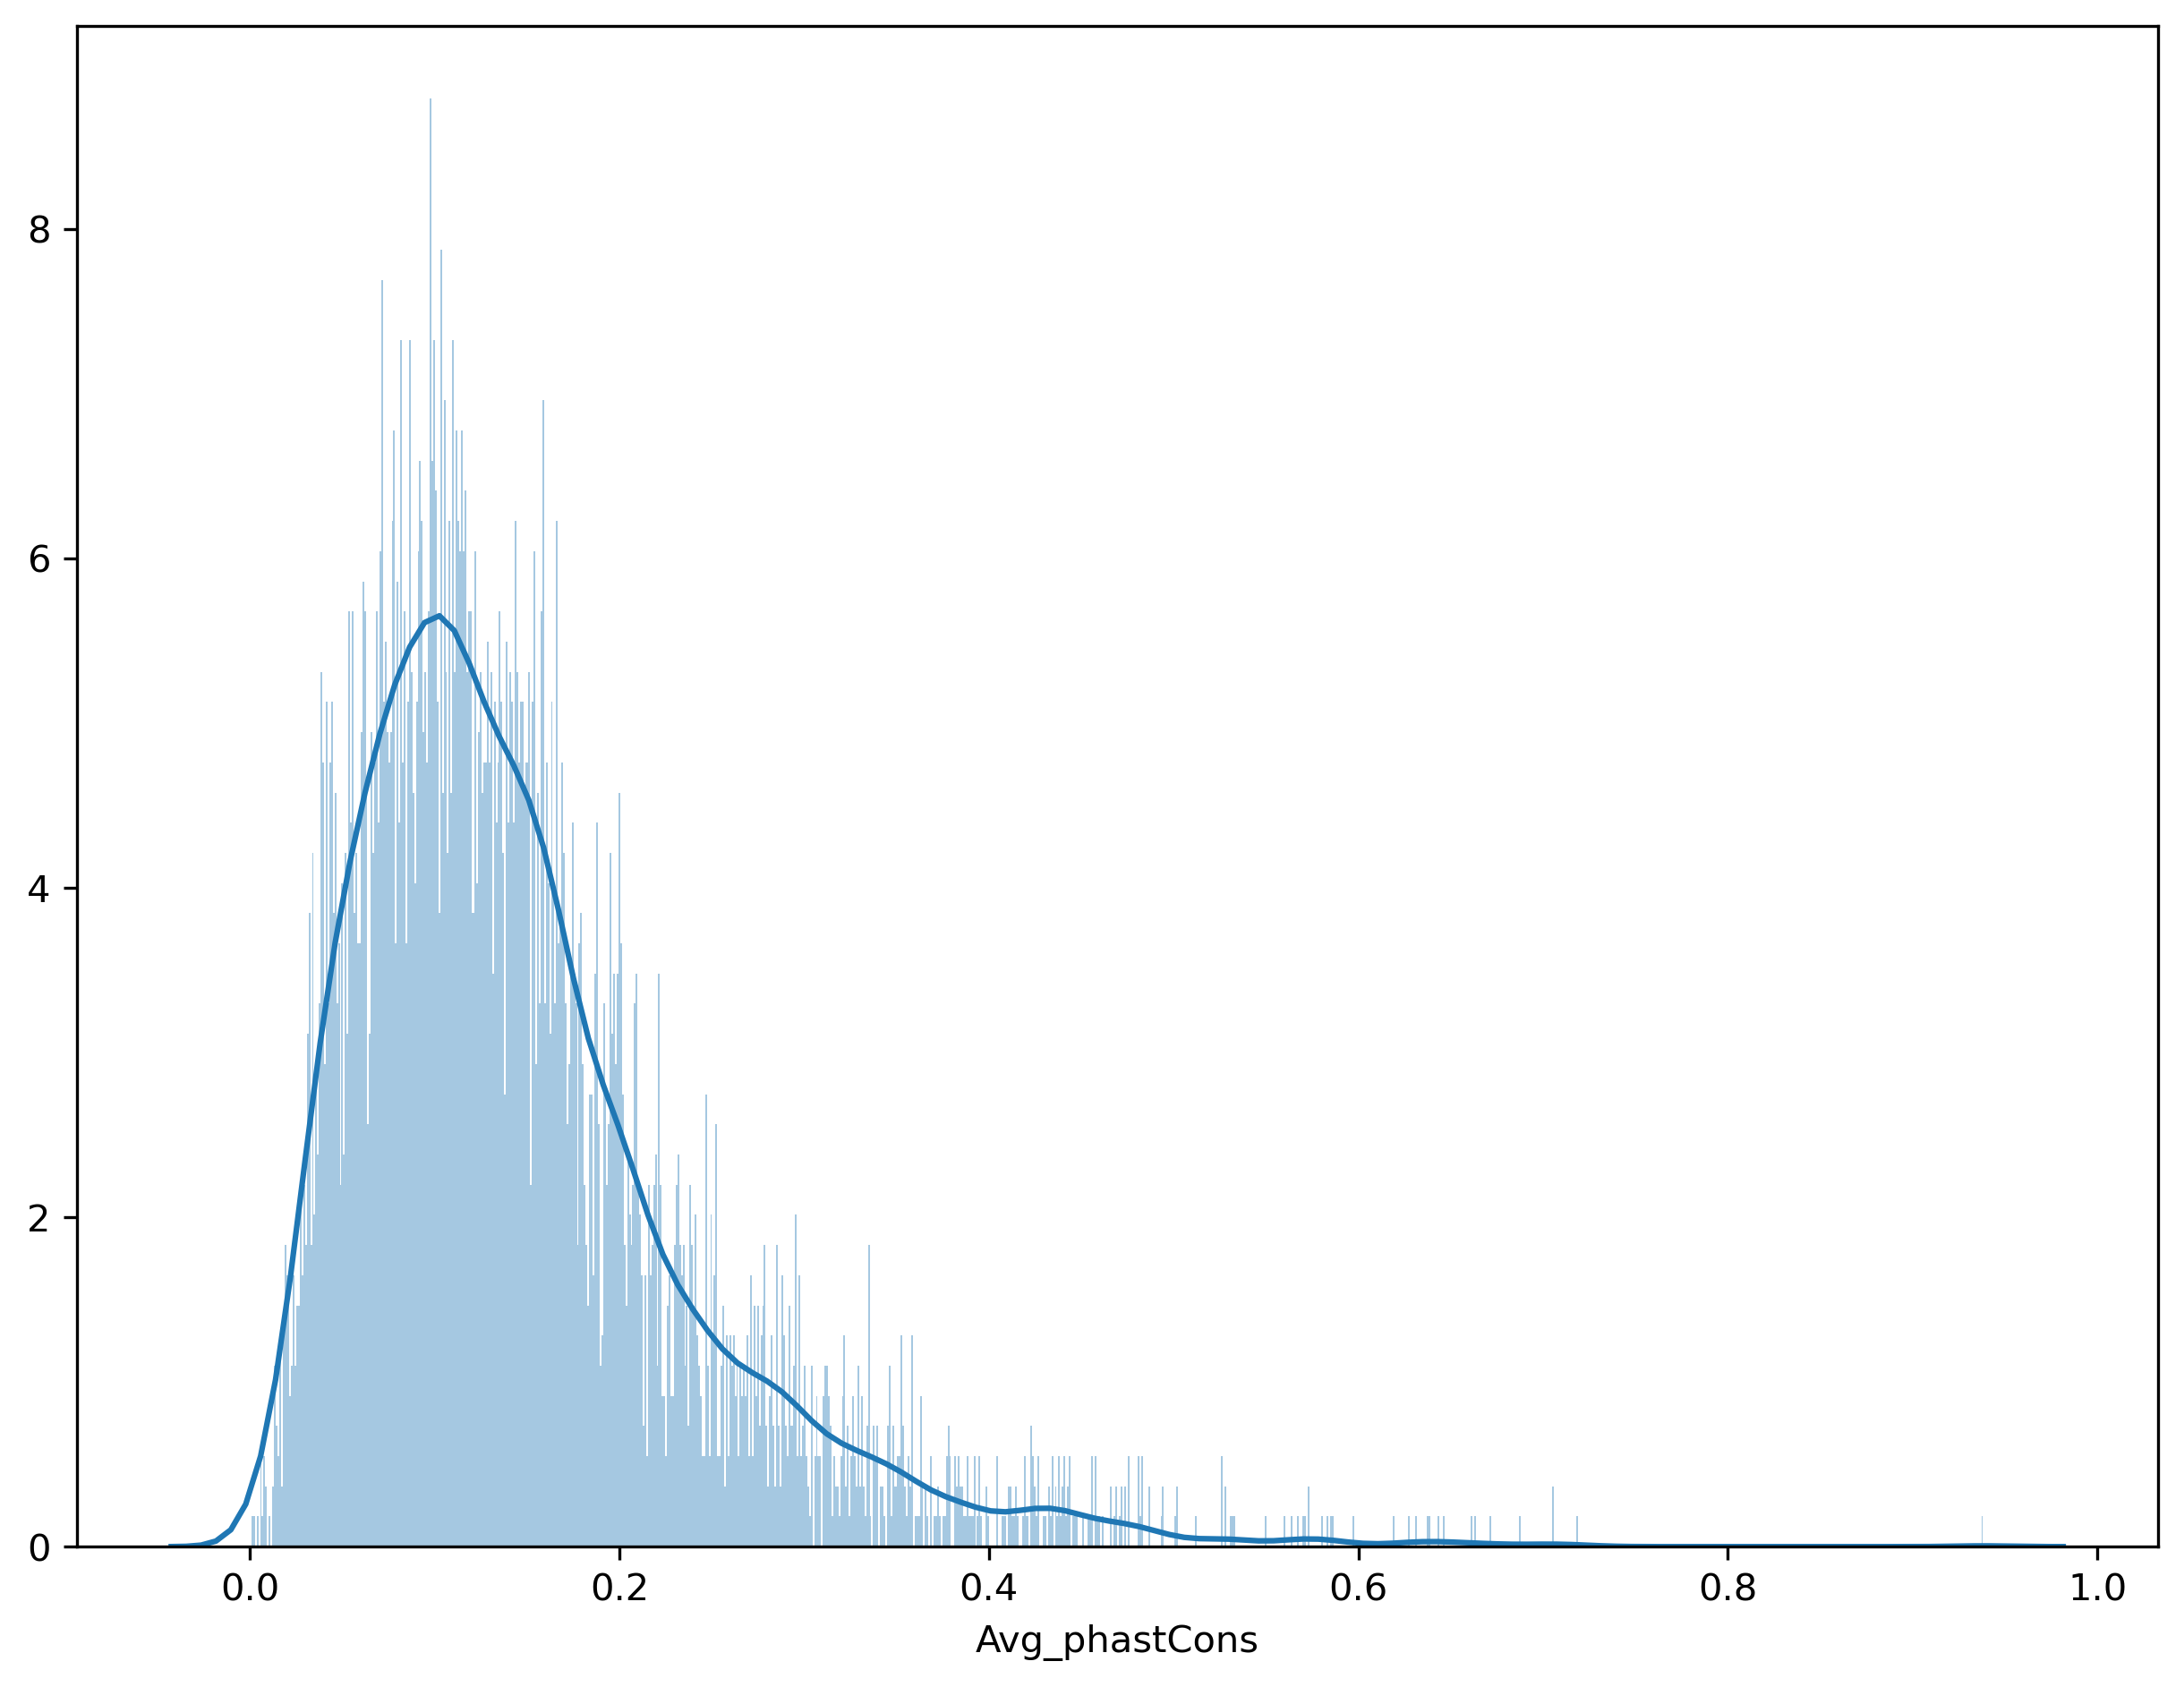

In [8]:
fig = plt.figure(figsize=(10,7.5))
ax = fig.add_subplot()
ax = sns.distplot(df['Avg_phastCons'],bins=1000)
# _=ax.set(xscale='log')
plt.show()

In [9]:
import statsmodels.api as sm
import pylab

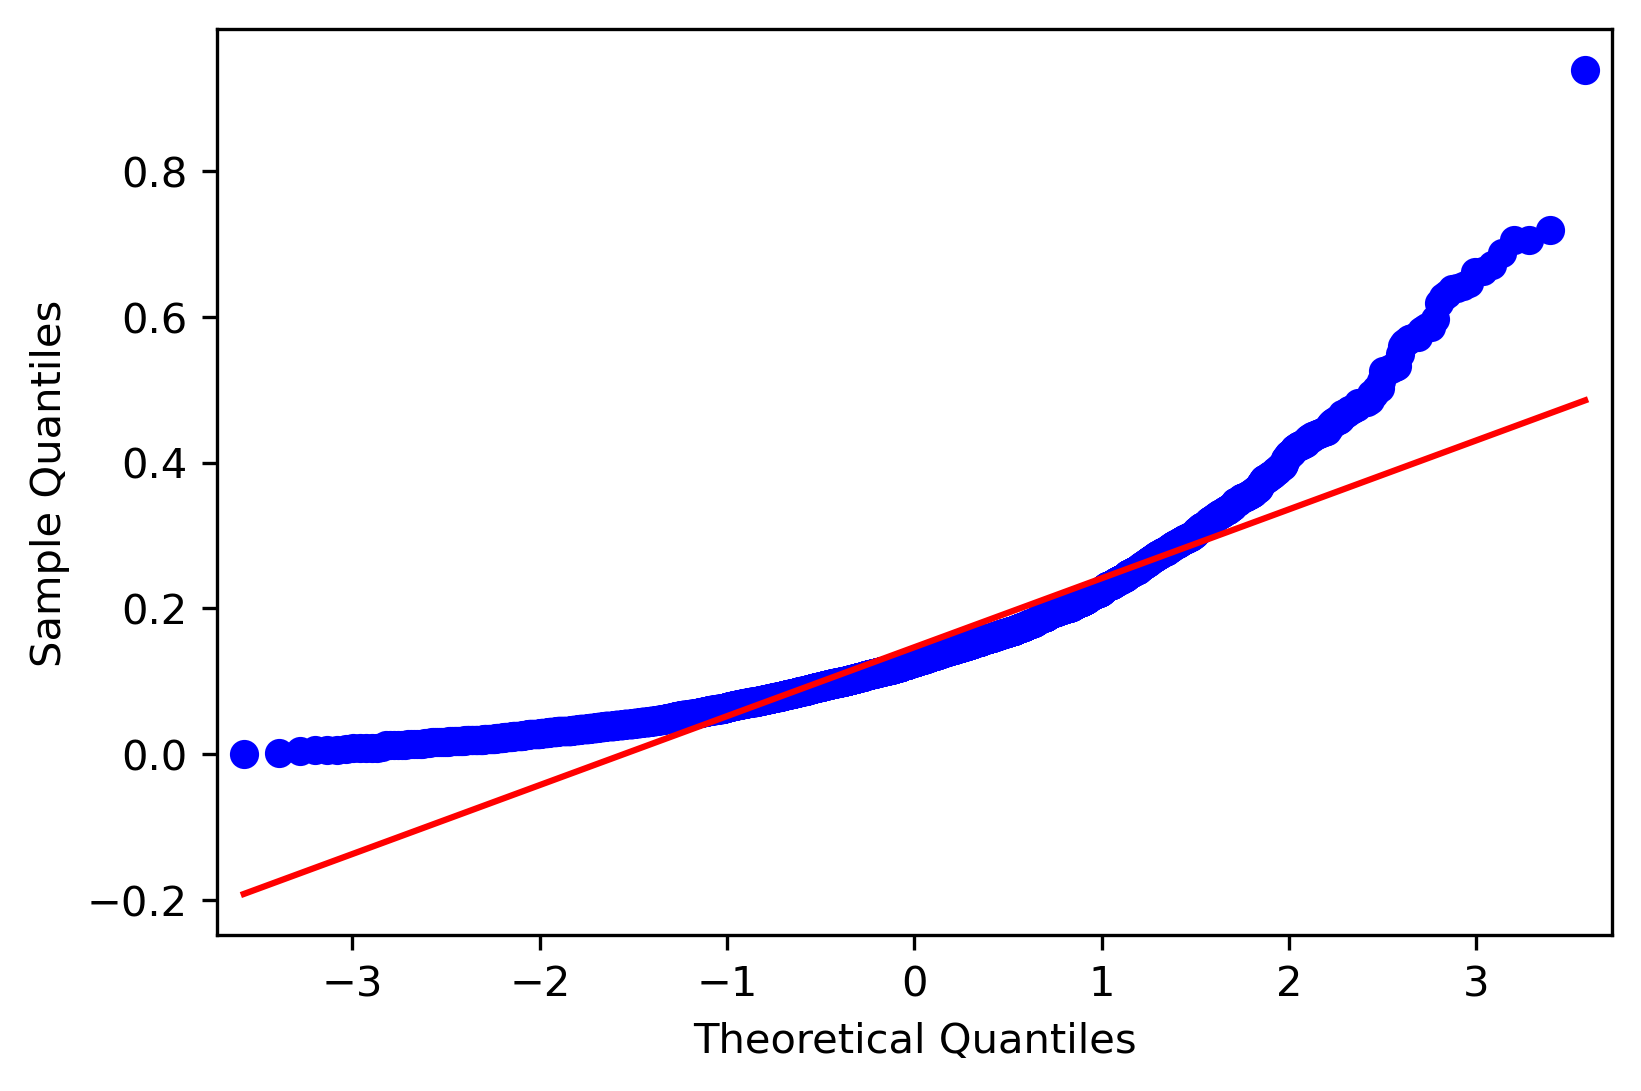

In [10]:
sm.qqplot(df['Avg_phastCons'], line='s')
pylab.show()

We see that phastCons are not normally distributed. Non-parametric approaches will be used for analyzing phastCons. 

### Mann Whitney U test between pairs of cell types

In [24]:
stats.mannwhitneyu(
        df[df['Celltype']=='Glia']['Avg_phastCons'].values,
        df[df['Celltype']=='Neuron']['Avg_phastCons'].values,
        alternative="two-sided")

MannwhitneyuResult(statistic=725052.0, pvalue=0.0030040013036052495)

In [25]:
stats.mannwhitneyu(
        df[df['Celltype']=='Endothelia']['Avg_phastCons'].values,
        df[df['Celltype']=='Neuron']['Avg_phastCons'].values,
        alternative="two-sided")

MannwhitneyuResult(statistic=571684.0, pvalue=0.0408171842462815)

In [30]:
stats.mannwhitneyu(
        df[df['Celltype']=='Endothelia']['Avg_phastCons'].values,
        df[df['Celltype']=='Glia']['Avg_phastCons'].values,
        alternative="two-sided")

MannwhitneyuResult(statistic=572923.0, pvalue=0.466136475634502)

In [22]:
palette={'Endothelia':'tab:blue','Glia':'tab:green','Neuron':'tab:red','Oligodendrocyte':'lightblue','Astrocyte':'lightgreen','Microglia':'tab:orange'}

In [23]:
from statannot import add_stat_annotation

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Neuron v.s. Endothelia: Mann-Whitney-Wilcoxon test two-sided, P_val=4.082e-02 U_stat=6.328e+05
Endothelia v.s. Glia: Mann-Whitney-Wilcoxon test two-sided, P_val=4.661e-01 U_stat=5.729e+05
Neuron v.s. Glia: Mann-Whitney-Wilcoxon test two-sided, P_val=3.004e-03 U_stat=8.319e+05


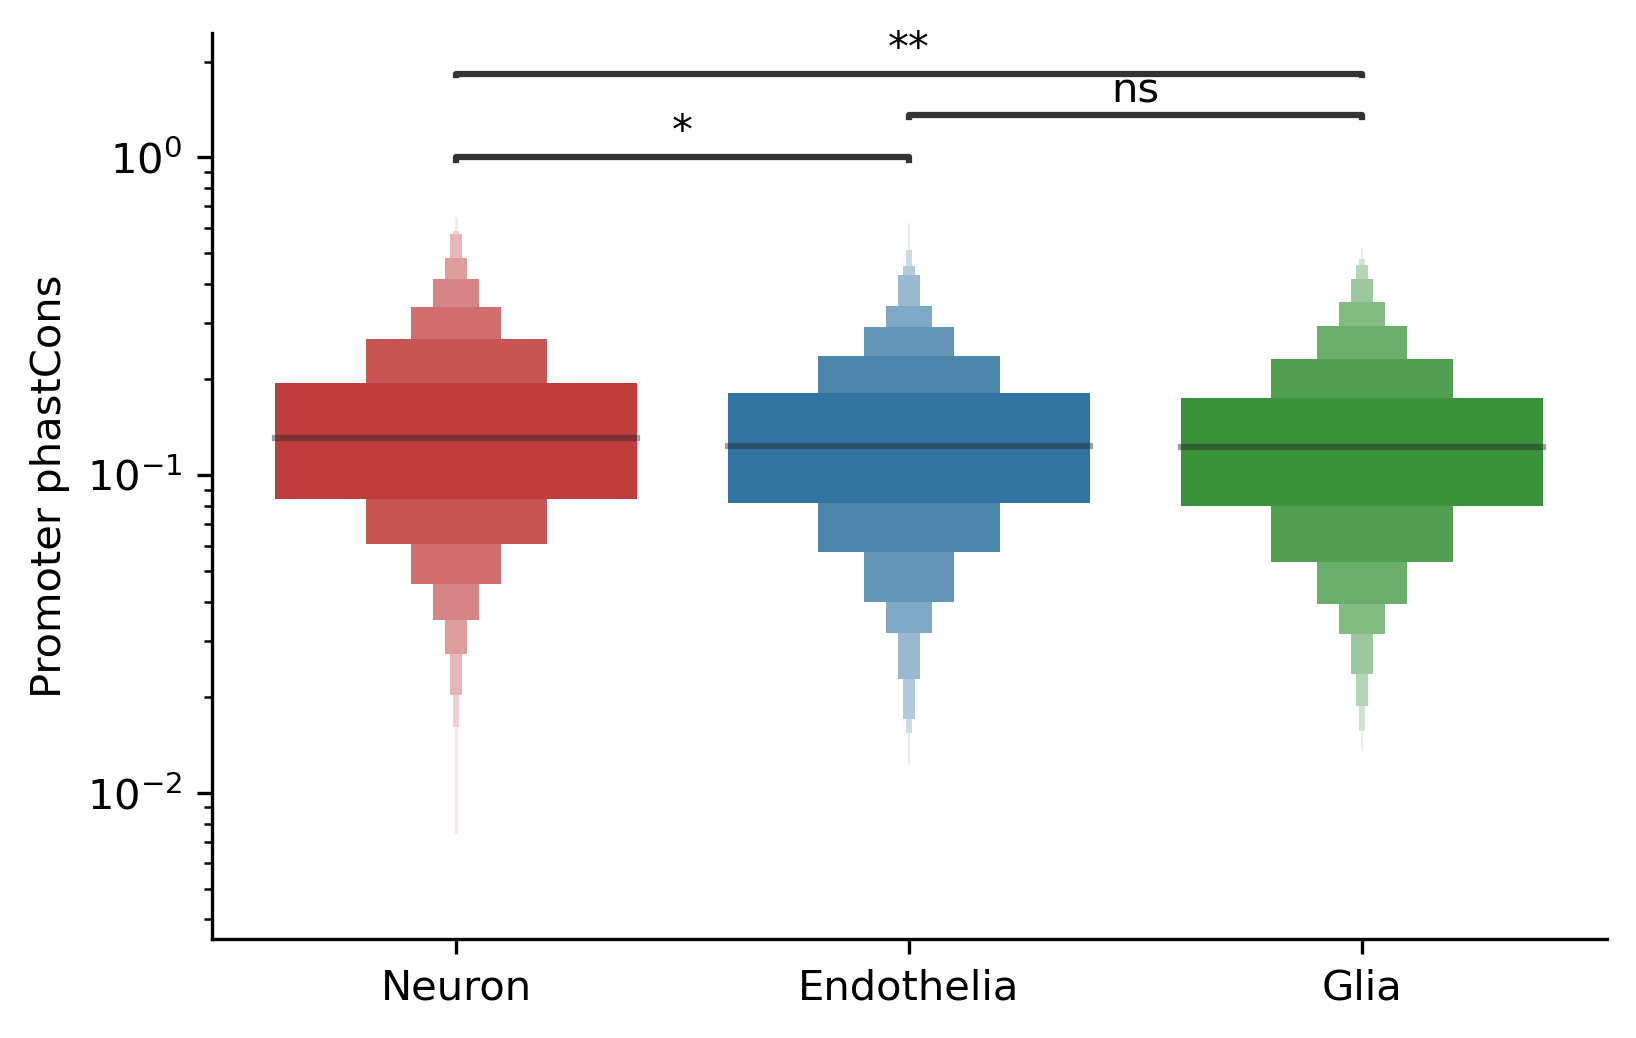

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.set(yscale='log')
# ax.set_ylim(0.0008,6)

ax=sns.boxenplot(x='Celltype',y='Avg_phastCons',
                 data=df[df['Celltype'].isin(['Neuron','Glia','Endothelia'])],
                 palette=palette,showfliers=False,outlier_prop=0,
                 order=['Neuron','Endothelia','Glia'])

# order=['Astrocyte','Neuron','Endothelia','Oligodendrocyte','Microglia','Glia']

ax.set(ylabel='Promoter phastCons',xlabel='')
sns.despine()
ax.set(yscale='log')
# Debug Nov. 10th, 2020: add comparisons_correction parameter
stats = add_stat_annotation(ax=ax,data=df,x="Celltype", y="Avg_phastCons",
                        box_pairs=[("Endothelia", "Neuron"),
                                   ("Endothelia", "Glia"),
                                   ("Glia","Neuron")],
                        test='Mann-Whitney', text_format='star',
                        comparisons_correction=None,
                        loc='outside', verbose=2, 
                        order=['Neuron','Endothelia','Glia'])
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.autoscale()
plt.savefig('../figures/MannWhitney/phastcons/NEG.svg')
plt.show()

Neuron v.s. Endothelia: Mann-Whitney-Wilcoxon test two-sided, P_val=4.082e-02 U_stat=6.328e+05
Endothelia v.s. Glia: Mann-Whitney-Wilcoxon test two-sided, P_val=4.661e-01 U_stat=5.729e+05
Neuron v.s. Glia: Mann-Whitney-Wilcoxon test two-sided, P_val=3.004e-03 U_stat=8.319e+05


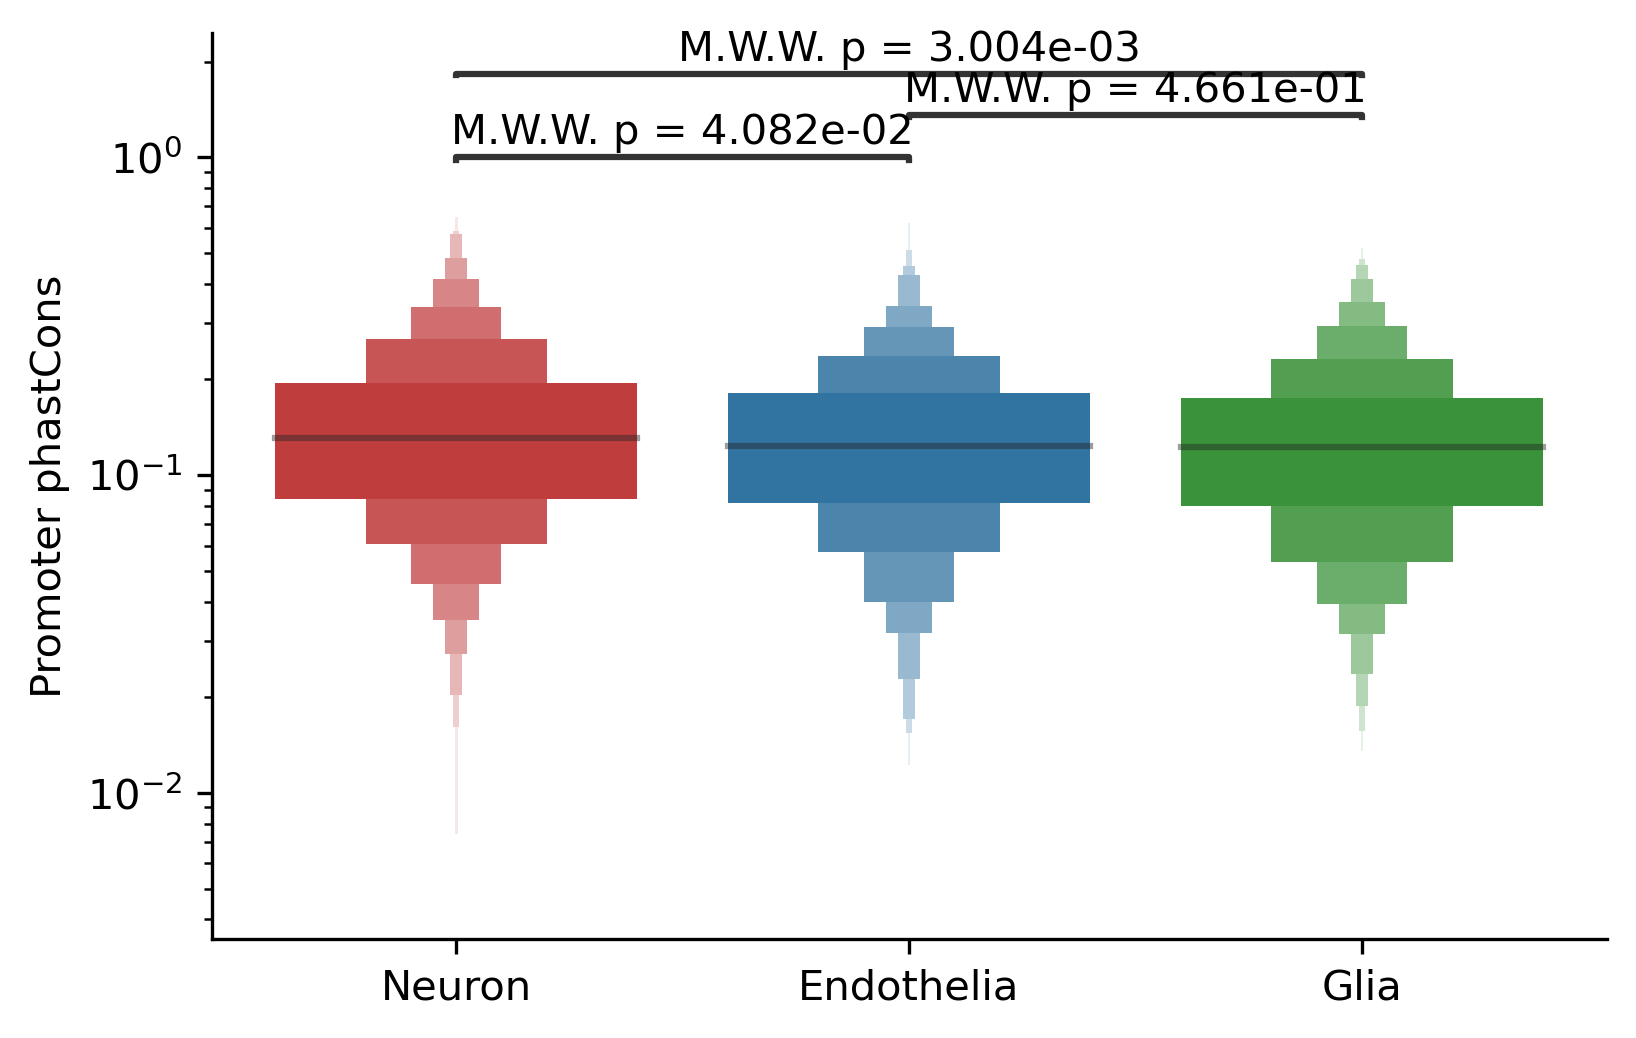

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.set(yscale='log')
# ax.set_ylim(0.0008,6)

ax=sns.boxenplot(x='Celltype',y='Avg_phastCons',
                 data=df[df['Celltype'].isin(['Neuron','Glia','Endothelia'])],
                 palette=palette,showfliers=False,outlier_prop=0,
                 order=['Neuron','Endothelia','Glia'])

# order=['Astrocyte','Neuron','Endothelia','Oligodendrocyte','Microglia','Glia']

ax.set(ylabel='Promoter phastCons',xlabel='')
sns.despine()
ax.set(yscale='log')
# Debug Nov. 10th, 2020: add comparisons_correction parameter
stats = add_stat_annotation(ax=ax,data=df,x="Celltype", y="Avg_phastCons",
                        box_pairs=[("Endothelia", "Neuron"),
                                   ("Endothelia", "Glia"),
                                   ("Glia","Neuron")],
                        test='Mann-Whitney', text_format='full',
                        comparisons_correction=None,
                        loc='outside', verbose=2, 
                        order=['Neuron','Endothelia','Glia'])
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.autoscale()
plt.savefig('../figures/MannWhitney/phastcons/NEG_p_value.svg')
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Astrocyte v.s. Neuron: Mann-Whitney-Wilcoxon test two-sided, P_val=5.240e-01 U_stat=5.380e+05
Neuron v.s. Oligodendrocyte: Mann-Whitney-Wilcoxon test two-sided, P_val=3.442e-02 U_stat=3.529e+05
Neuron v.s. Microglia: Mann-Whitney-Wilcoxon test two-sided, P_val=2.158e-02 U_stat=7.225e+05


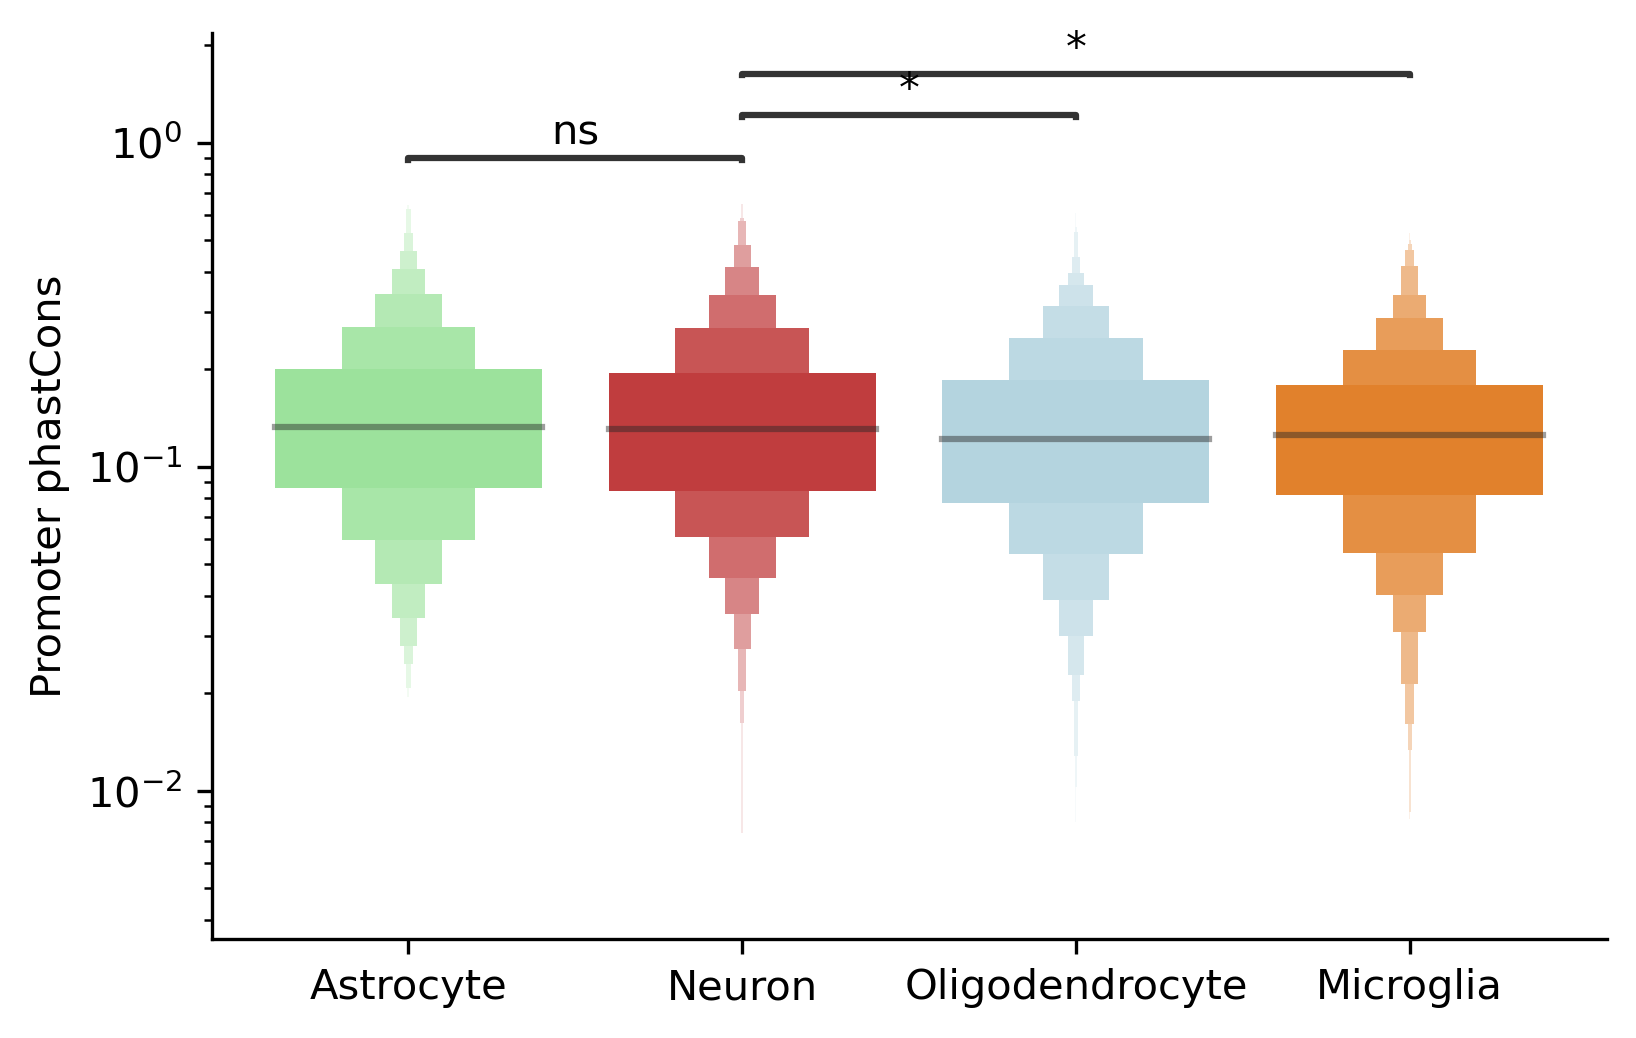

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.set(yscale='log')
# ax.set_ylim(0.0008,6)

ax=sns.boxenplot(x='Celltype',y='Avg_phastCons',
                 data=df[df['Celltype'].isin(['Neuron','Astrocyte','Oligodendrocyte','Microglia'])],
                 palette=palette,showfliers=False,outlier_prop=0,
                 order=['Astrocyte','Neuron','Oligodendrocyte','Microglia'])

# order=['Astrocyte','Neuron','Endothelia','Oligodendrocyte','Microglia','Glia']

ax.set(ylabel='Promoter phastCons',xlabel='')
sns.despine()
ax.set(yscale='log')
stat_annot = add_stat_annotation(ax=ax,data=df,x="Celltype", y="Avg_phastCons",
                        box_pairs=[("Astrocyte", "Neuron"),
                                   ("Neuron", "Oligodendrocyte"),
                                   ("Neuron","Microglia")],
                        test='Mann-Whitney', text_format='star',
                        loc='outside', verbose=2, 
                        comparisons_correction=None,
                        order=['Astrocyte','Neuron','Oligodendrocyte','Microglia'])
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(ax.get_xticklabels())
plt.autoscale()
plt.savefig('../figures/MannWhitney/phastcons/NAMO.png')
plt.show()

In [40]:
stats.kruskal(df[df['Celltype']=='Neuron']['Avg_phastCons'],
              df[df['Celltype']=='Endothelia']['Avg_phastCons'],
              df[df['Celltype']=='Astrocyte']['Avg_phastCons'],
              df[df['Celltype']=='Microglia']['Avg_phastCons'],
              df[df['Celltype']=='Oligodendrocyte']['Avg_phastCons'])

KruskalResult(statistic=13.68295924648318, pvalue=0.008378787378192627)

In [41]:
stats.kruskal(df[df['Celltype']=='Neuron']['Avg_phastCons'],
              df[df['Celltype']=='Endothelia']['Avg_phastCons'],
              df[df['Celltype']=='Glia']['Avg_phastCons'])

KruskalResult(statistic=9.45514196095685, pvalue=0.008847936769973523)

### Correlation between dN/dS and phastCons?

In [6]:
# df does not have gene name right now, so I need to find out the gene name corresponding to each averaged phastCons score
promoter_df=pd.read_csv('../results/Ensembl100_mouse/promoter_position.tsv', sep='\t')

small_start = df.Promoter_start.values
small_end = df.Promoter_end.values
small_chr = df.Chromosome.values
big_start = promoter_df.promoter_start.values
big_end = promoter_df.promoter_end.values
big_chr = promoter_df.chr.values


i, j = np.where((small_chr[:,None]==big_chr) & (small_start[:, None] >= big_start) & (small_end[:, None] <= big_end))

gene_phastcons_df=pd.DataFrame(
    np.column_stack([df.values[i], promoter_df.values[j]]),
    columns=df.columns.append(promoter_df.columns)
)

gene_phastcons_df=gene_phastcons_df[['gene','Avg_phastCons','Celltype']]

gene_phastcons_df.set_index('gene',inplace=True)

In [7]:
# load dN/dS data of genes specific to each cell type
celltype_list=['neuron','endothelia','glia','astrocyte','microglia','oligodendrocyte']
dNdS_dict={}
for celltype in celltype_list:
    dNdS_dict[celltype.capitalize()]=pd.read_csv('../results/mouse.celltype-specific_genes/protein-coding_w_dNdS/avg_92species/'
                                  +celltype+'.tsv',index_col=0, sep='\t')

In [8]:
# Merge dN/dS and phastCons of each gene
phast_dNdS_dict={}
for celltype in celltype_list:
    phast_dNdS_dict[celltype.capitalize()]=pd.merge(left=dNdS_dict[celltype.capitalize()],left_index=True,
                                                    right=gene_phastcons_df[gene_phastcons_df['Celltype']==celltype.capitalize()],right_index=True,
                                                    how='inner')
all_df=pd.concat(phast_dNdS_dict.values())
all_df.columns=['dNdS','phastCons','Celltype']

all_df['phastCons']=all_df['phastCons'].astype(float)

In [9]:
# remove outliers where dN/dS is greater than or equals to 2
no_outlier_df=all_df[all_df['dNdS']<2]

### Spearman Rank Correlation for non-parametric data

In [14]:
stats.spearmanr(no_outlier_df.dNdS.values,no_outlier_df.phastCons.values)

SpearmanrResult(correlation=-0.08251867376268322, pvalue=2.878132671749687e-10)

We can see that although dNdS and phastCons' correlation are significant, the effect size are not. To see more detail, lets use the pingouin package. 

In [15]:
import pingouin as pg

In [16]:
pg.corr(no_outlier_df.dNdS.values,no_outlier_df.phastCons.values,method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,5821,-0.082519,"[-0.11, -0.06]",0.006809,0.006468,2.878133e-10,0.999993


### Pseudo Linear Regression Model - assume both phastCon and dNdS are normalled distributed. 

In [159]:
import patsy

In [229]:
y, x = patsy.dmatrices('phastCons ~ dNdS', no_outlier_df[~no_outlier_df['Celltype'].isin(['Glia'])])

In [167]:
import statsmodels.api as sm

In [230]:
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())
# Look for the two coef--gives you the formula of the fitted model
# Usually report F-stats and its p-value, as well as the two degrees of freedom 
# E.g., phastCons=-0.0404*dNdS+0.1533, F(1,5819)=29.22, p=6.37e-8,R^2=0.005

                            OLS Regression Results                            
Dep. Variable:              phastCons   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     22.63
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           2.03e-06
Time:                        15:10:57   Log-Likelihood:                 4259.2
No. Observations:                4615   AIC:                            -8514.
Df Residuals:                    4613   BIC:                            -8501.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1550      0.002     79.214      0.0

### See if log-transformed data are normally distributed

While we ran a linear regression model over the relationship between dN/dS and phastCons of each gene, keep in mind that neither data are in fact normally distributed. Therefore we should try and find out if we can transform each into normally distributed data. 

In [189]:
no_outlier_df

,dNdS,phastCons,Celltype
1500009L16Rik,0.203317,0.193231,Neuron
1700001L19Rik,0.246097,0.090202,Neuron
4930444P10Rik,0.366798,0.109885,Neuron
4930447C04Rik,0.314530,0.271406,Neuron
4930452B06Rik,0.260316,0.147778,Neuron
...,...,...,...
Zdhhc2,0.077988,0.070645,Oligodendrocyte
Zdhhc9,0.052152,0.272193,Oligodendrocyte
Zfp239,0.036849,0.129288,Oligodendrocyte
Zfp365,0.108997,0.306246,Oligodendrocyte


In [205]:
from scipy import stats

In [207]:
stats.boxcox(no_outlier_df['phastCons'])

(array([-1.37501703, -1.85949967, -1.74180594, ..., -1.64085589,
        -1.03942432, -2.31116753]),
 0.22415081740044493)

In [211]:
log_no_outlier_df=pd.DataFrame()

log_no_outlier_df['ln_dNdS']=np.log(no_outlier_df['dNdS'])
log_no_outlier_df['log_dNdS']=np.log10(no_outlier_df['dNdS'])
log_no_outlier_df['ln_phastCons']=np.log(no_outlier_df['phastCons'])
log_no_outlier_df['log_phastCons']=np.log10(no_outlier_df['phastCons'])
log_no_outlier_df['sqrt_phastCons']=np.sqrt(no_outlier_df['phastCons'])
log_no_outlier_df['box_cox_phastCons']=stats.boxcox(no_outlier_df['phastCons'])[0]

log_no_outlier_df['Celltype']=no_outlier_df['Celltype']

In [212]:
log_no_outlier_df

,ln_dNdS,log_dNdS,ln_phastCons,log_phastCons,sqrt_phastCons,box_cox_phastCons,Celltype
1500009L16Rik,-1.592987,-0.691825,-1.643869,-0.713923,0.439580,-1.375017,Neuron
1700001L19Rik,-1.402028,-0.608893,-2.405699,-1.044782,0.300337,-1.859500,Neuron
4930444P10Rik,-1.002944,-0.435573,-2.208321,-0.959062,0.331489,-1.741806,Neuron
4930447C04Rik,-1.156676,-0.502338,-1.304139,-0.566381,0.520966,-1.130816,Neuron
4930452B06Rik,-1.345859,-0.584499,-1.912044,-0.830390,0.384419,-1.555072,Neuron
...,...,...,...,...,...,...,...
Zdhhc2,-2.551206,-1.107975,-2.650091,-1.150920,0.265791,-1.998193,Oligodendrocyte
Zdhhc9,-2.953593,-1.282729,-1.301244,-0.565123,0.521721,-1.128654,Oligodendrocyte
Zfp239,-3.300939,-1.433579,-2.045713,-0.888442,0.359566,-1.640856,Oligodendrocyte
Zfp365,-2.216439,-0.962587,-1.183367,-0.513930,0.553395,-1.039424,Oligodendrocyte


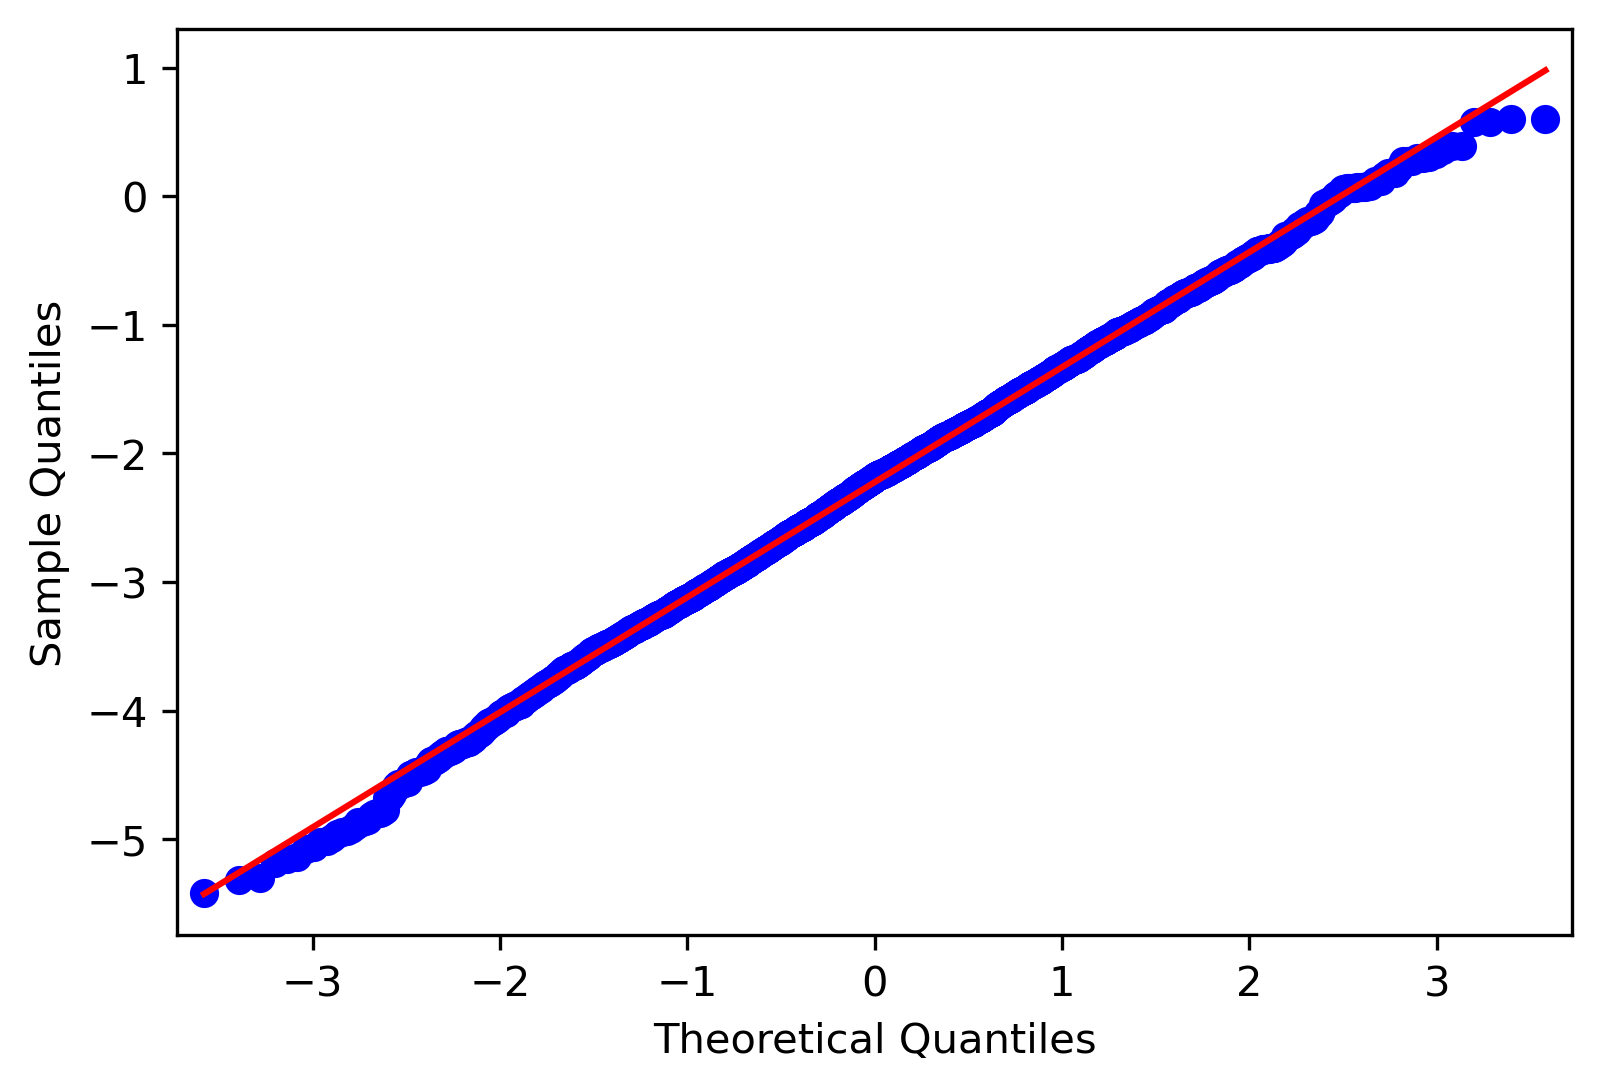

In [200]:
sm.qqplot(log_no_outlier_df['ln_dNdS'], line='s')
pylab.show()

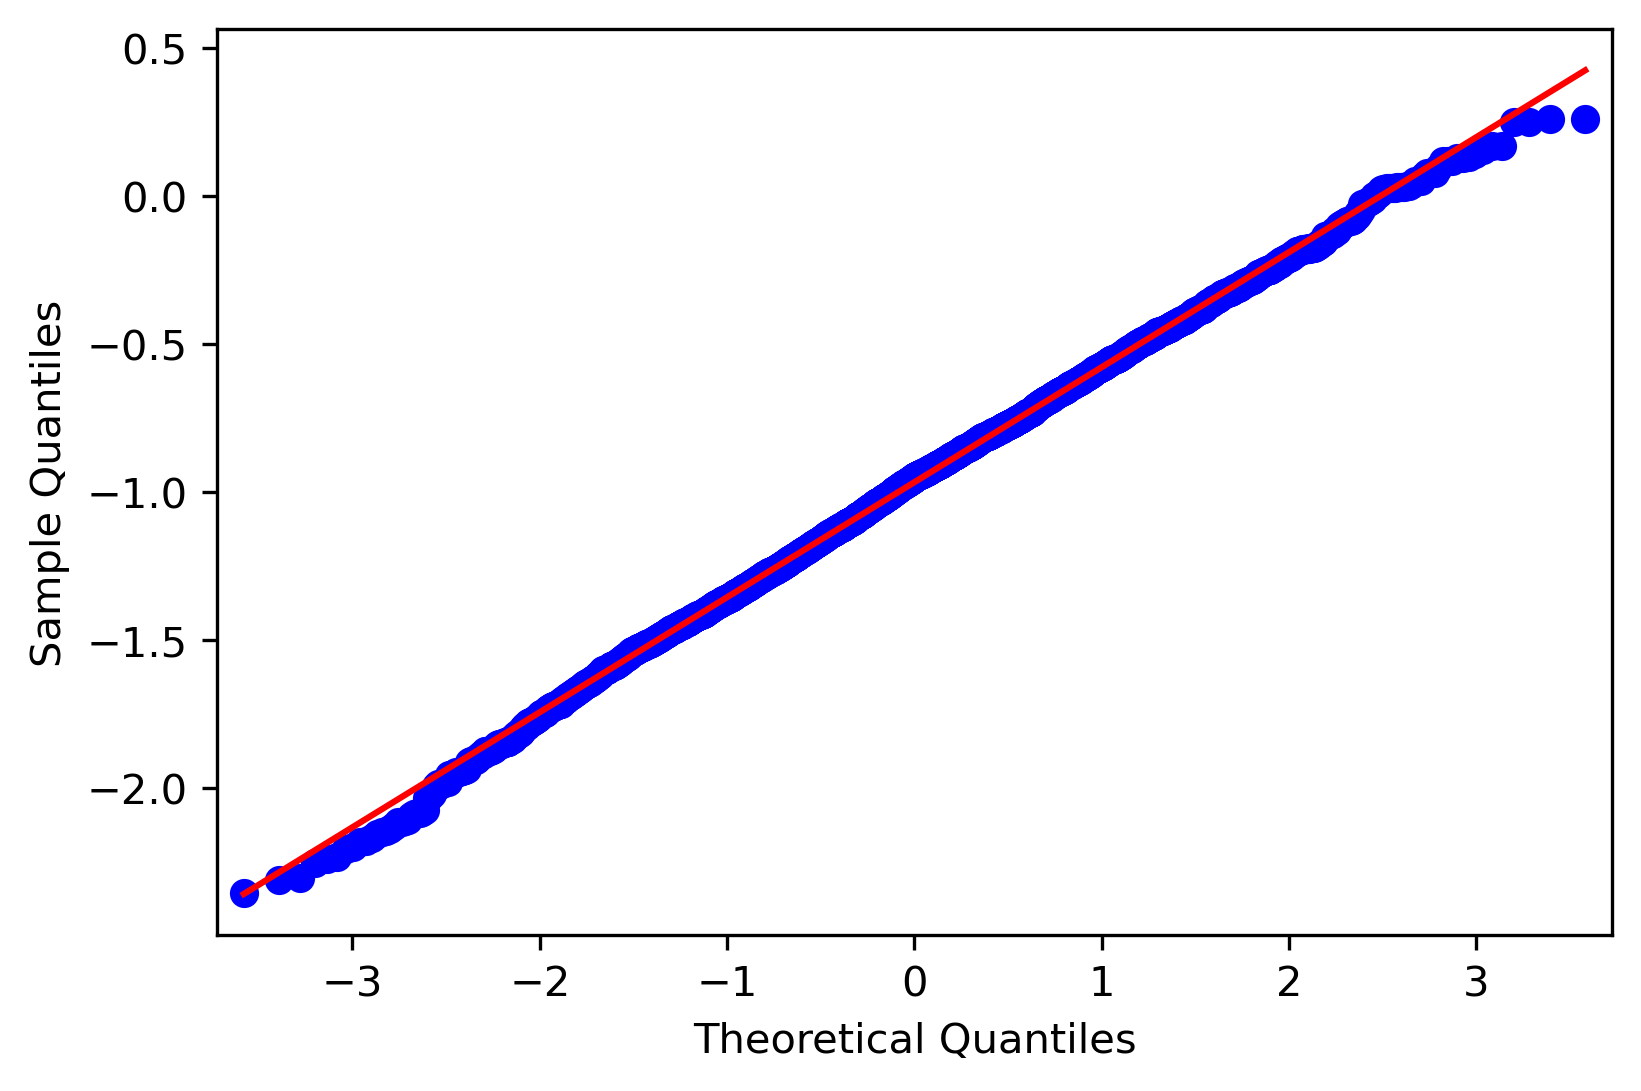

In [199]:
sm.qqplot(log_no_outlier_df['log_dNdS'], line='s')
pylab.show()

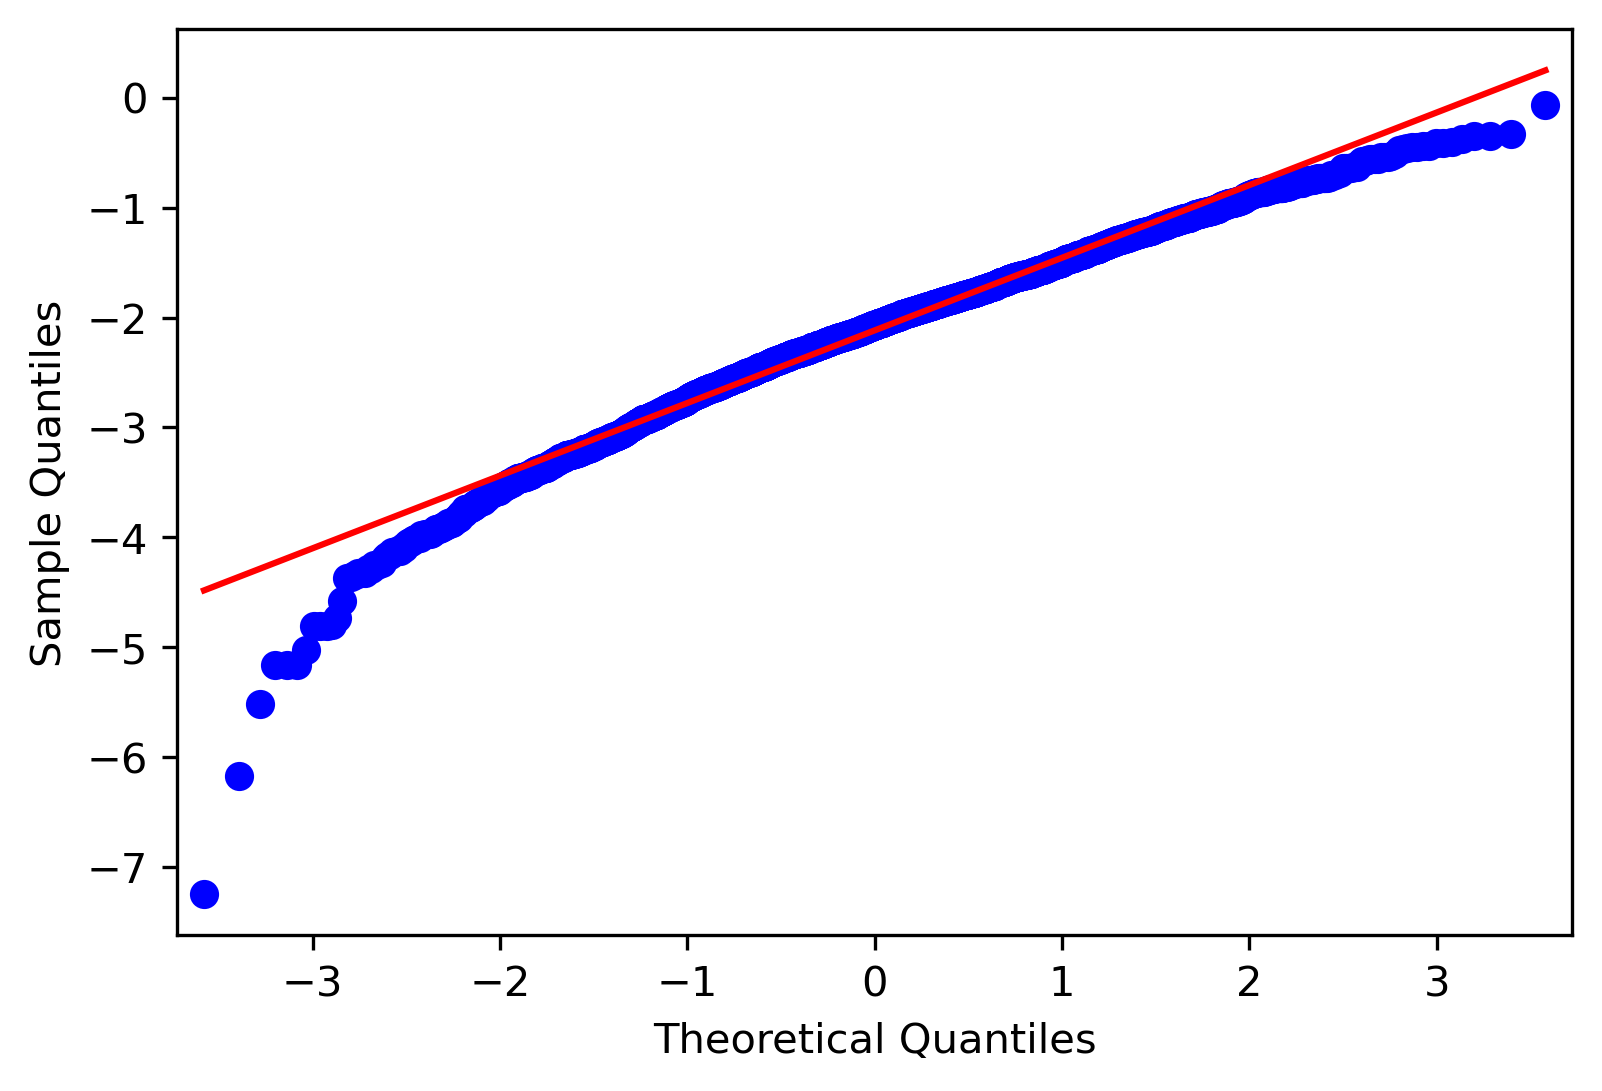

In [201]:
sm.qqplot(log_no_outlier_df['ln_phastCons'], line='s')
pylab.show()

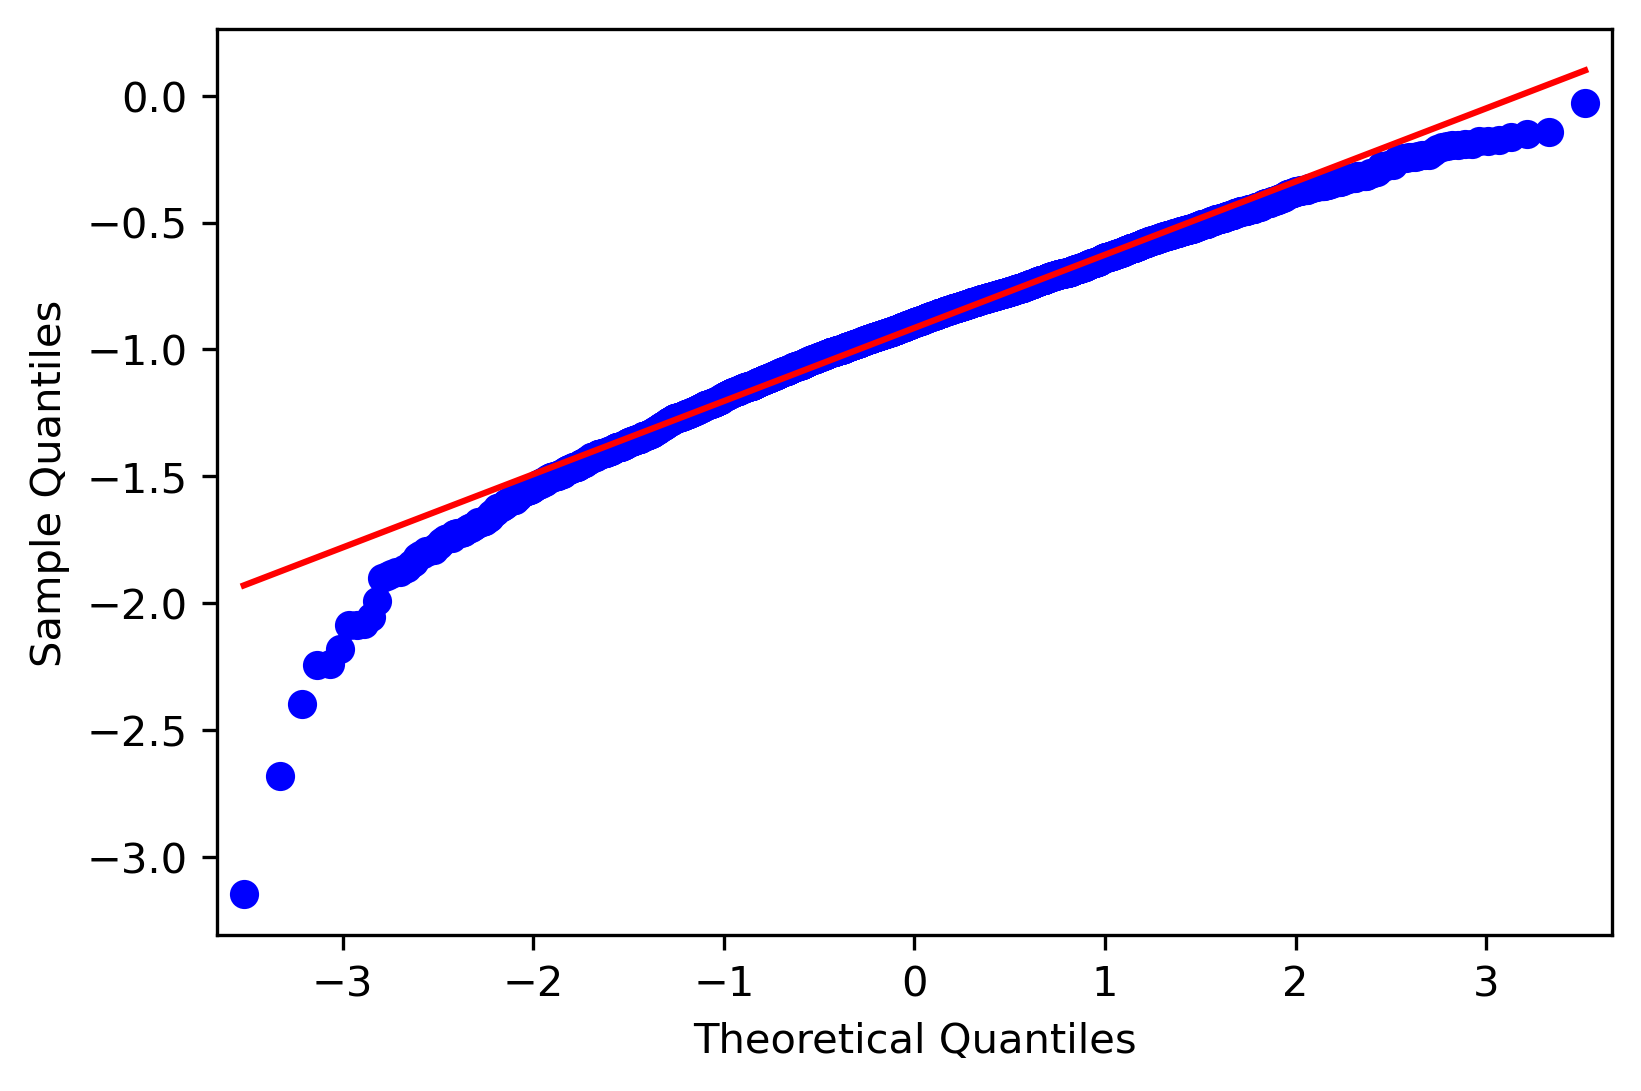

In [227]:
sm.qqplot(log_no_outlier_df[~log_no_outlier_df['Celltype'].isin(['Glia'])]['log_phastCons'], line='s')
pylab.show()

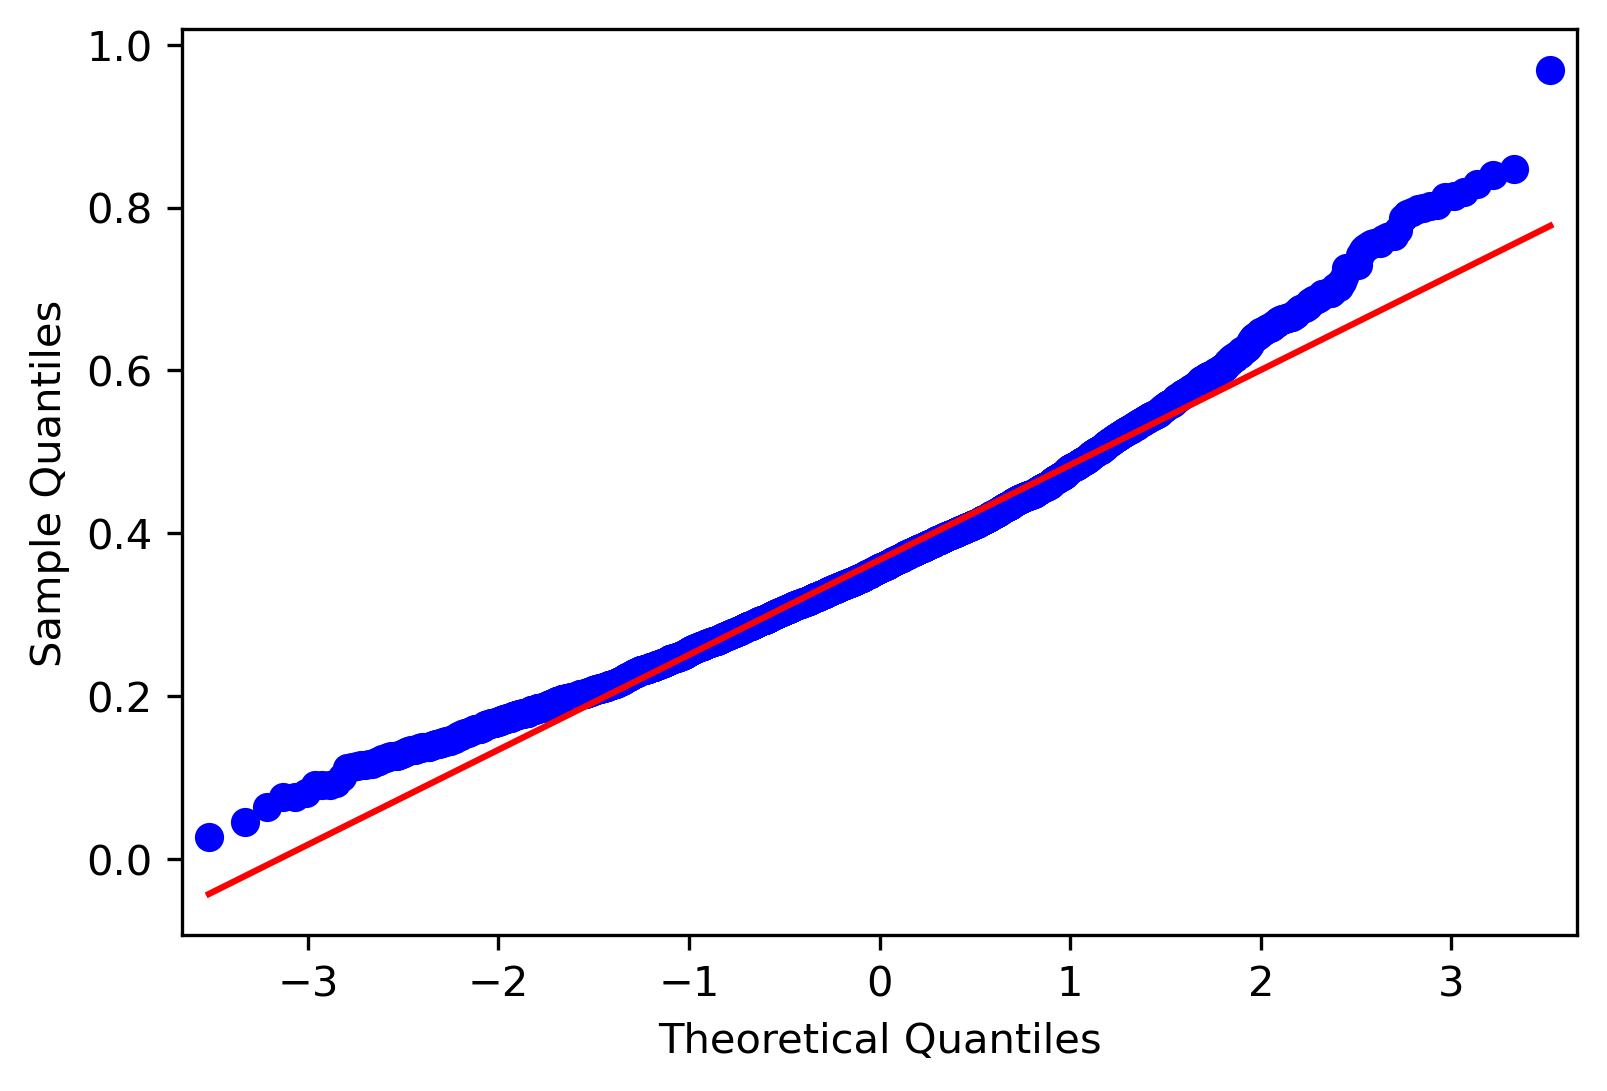

In [228]:
sm.qqplot(log_no_outlier_df[~log_no_outlier_df['Celltype'].isin(['Glia'])]['sqrt_phastCons'], line='s')
pylab.show()

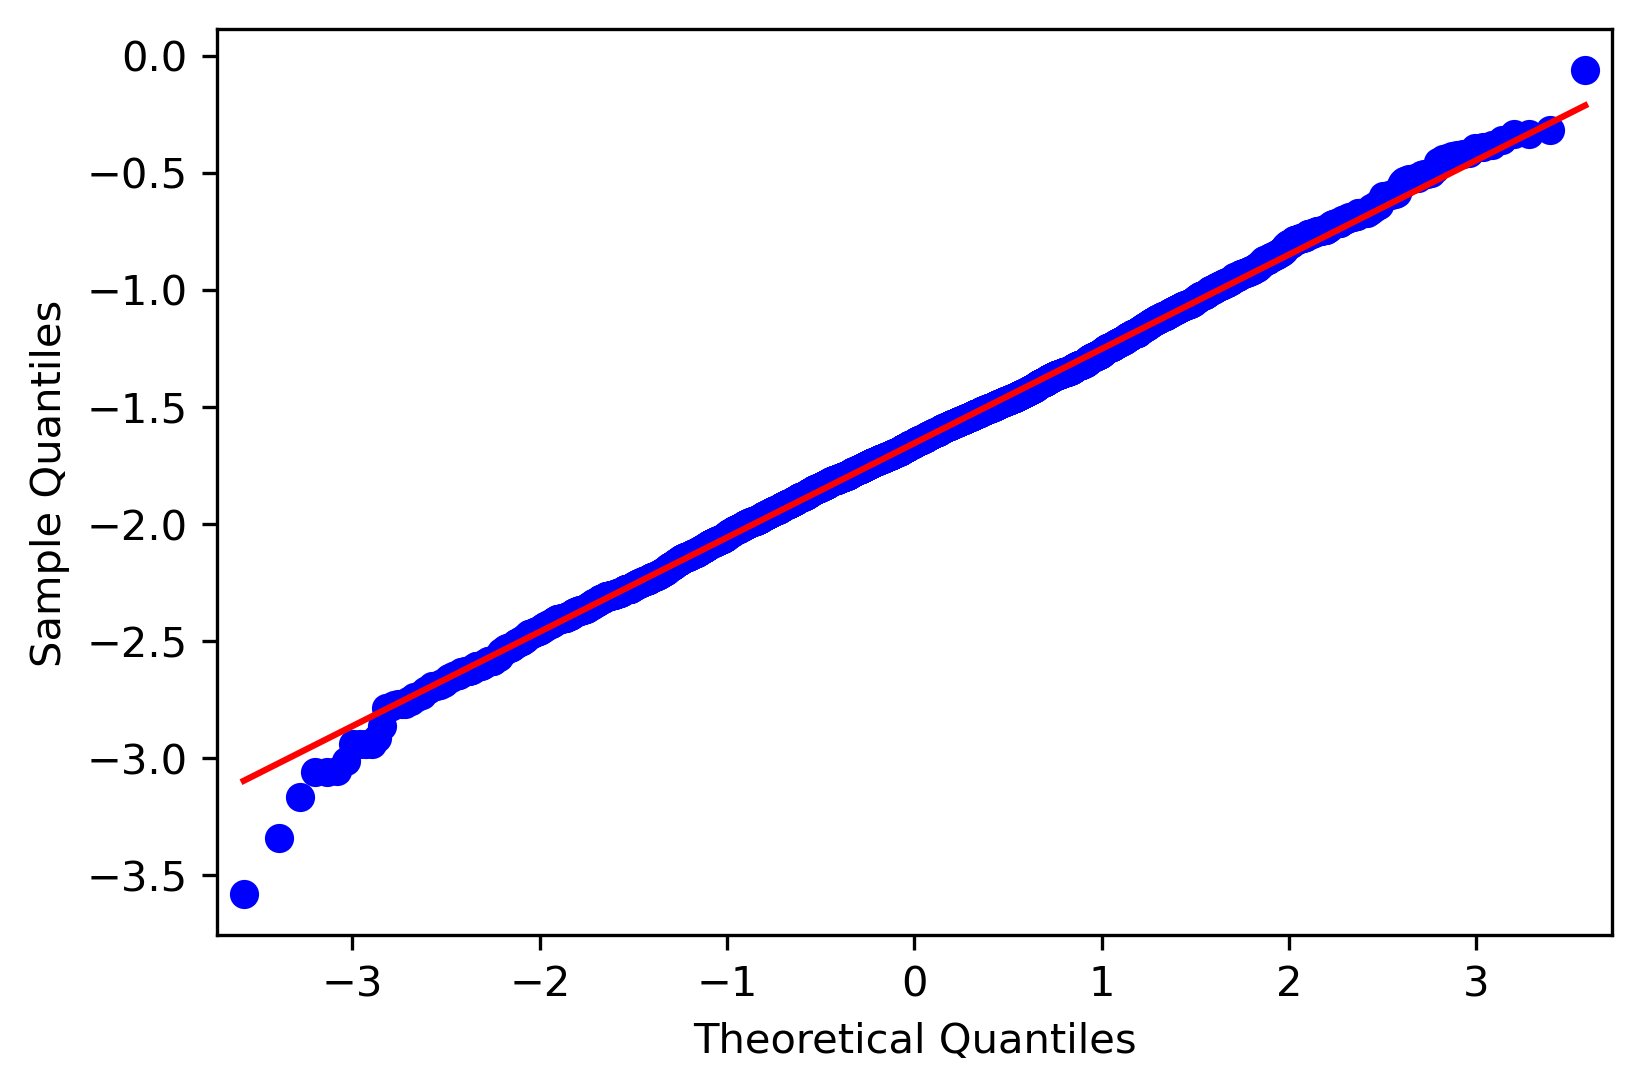

In [213]:
sm.qqplot(log_no_outlier_df['box_cox_phastCons'], line='s')
pylab.show()

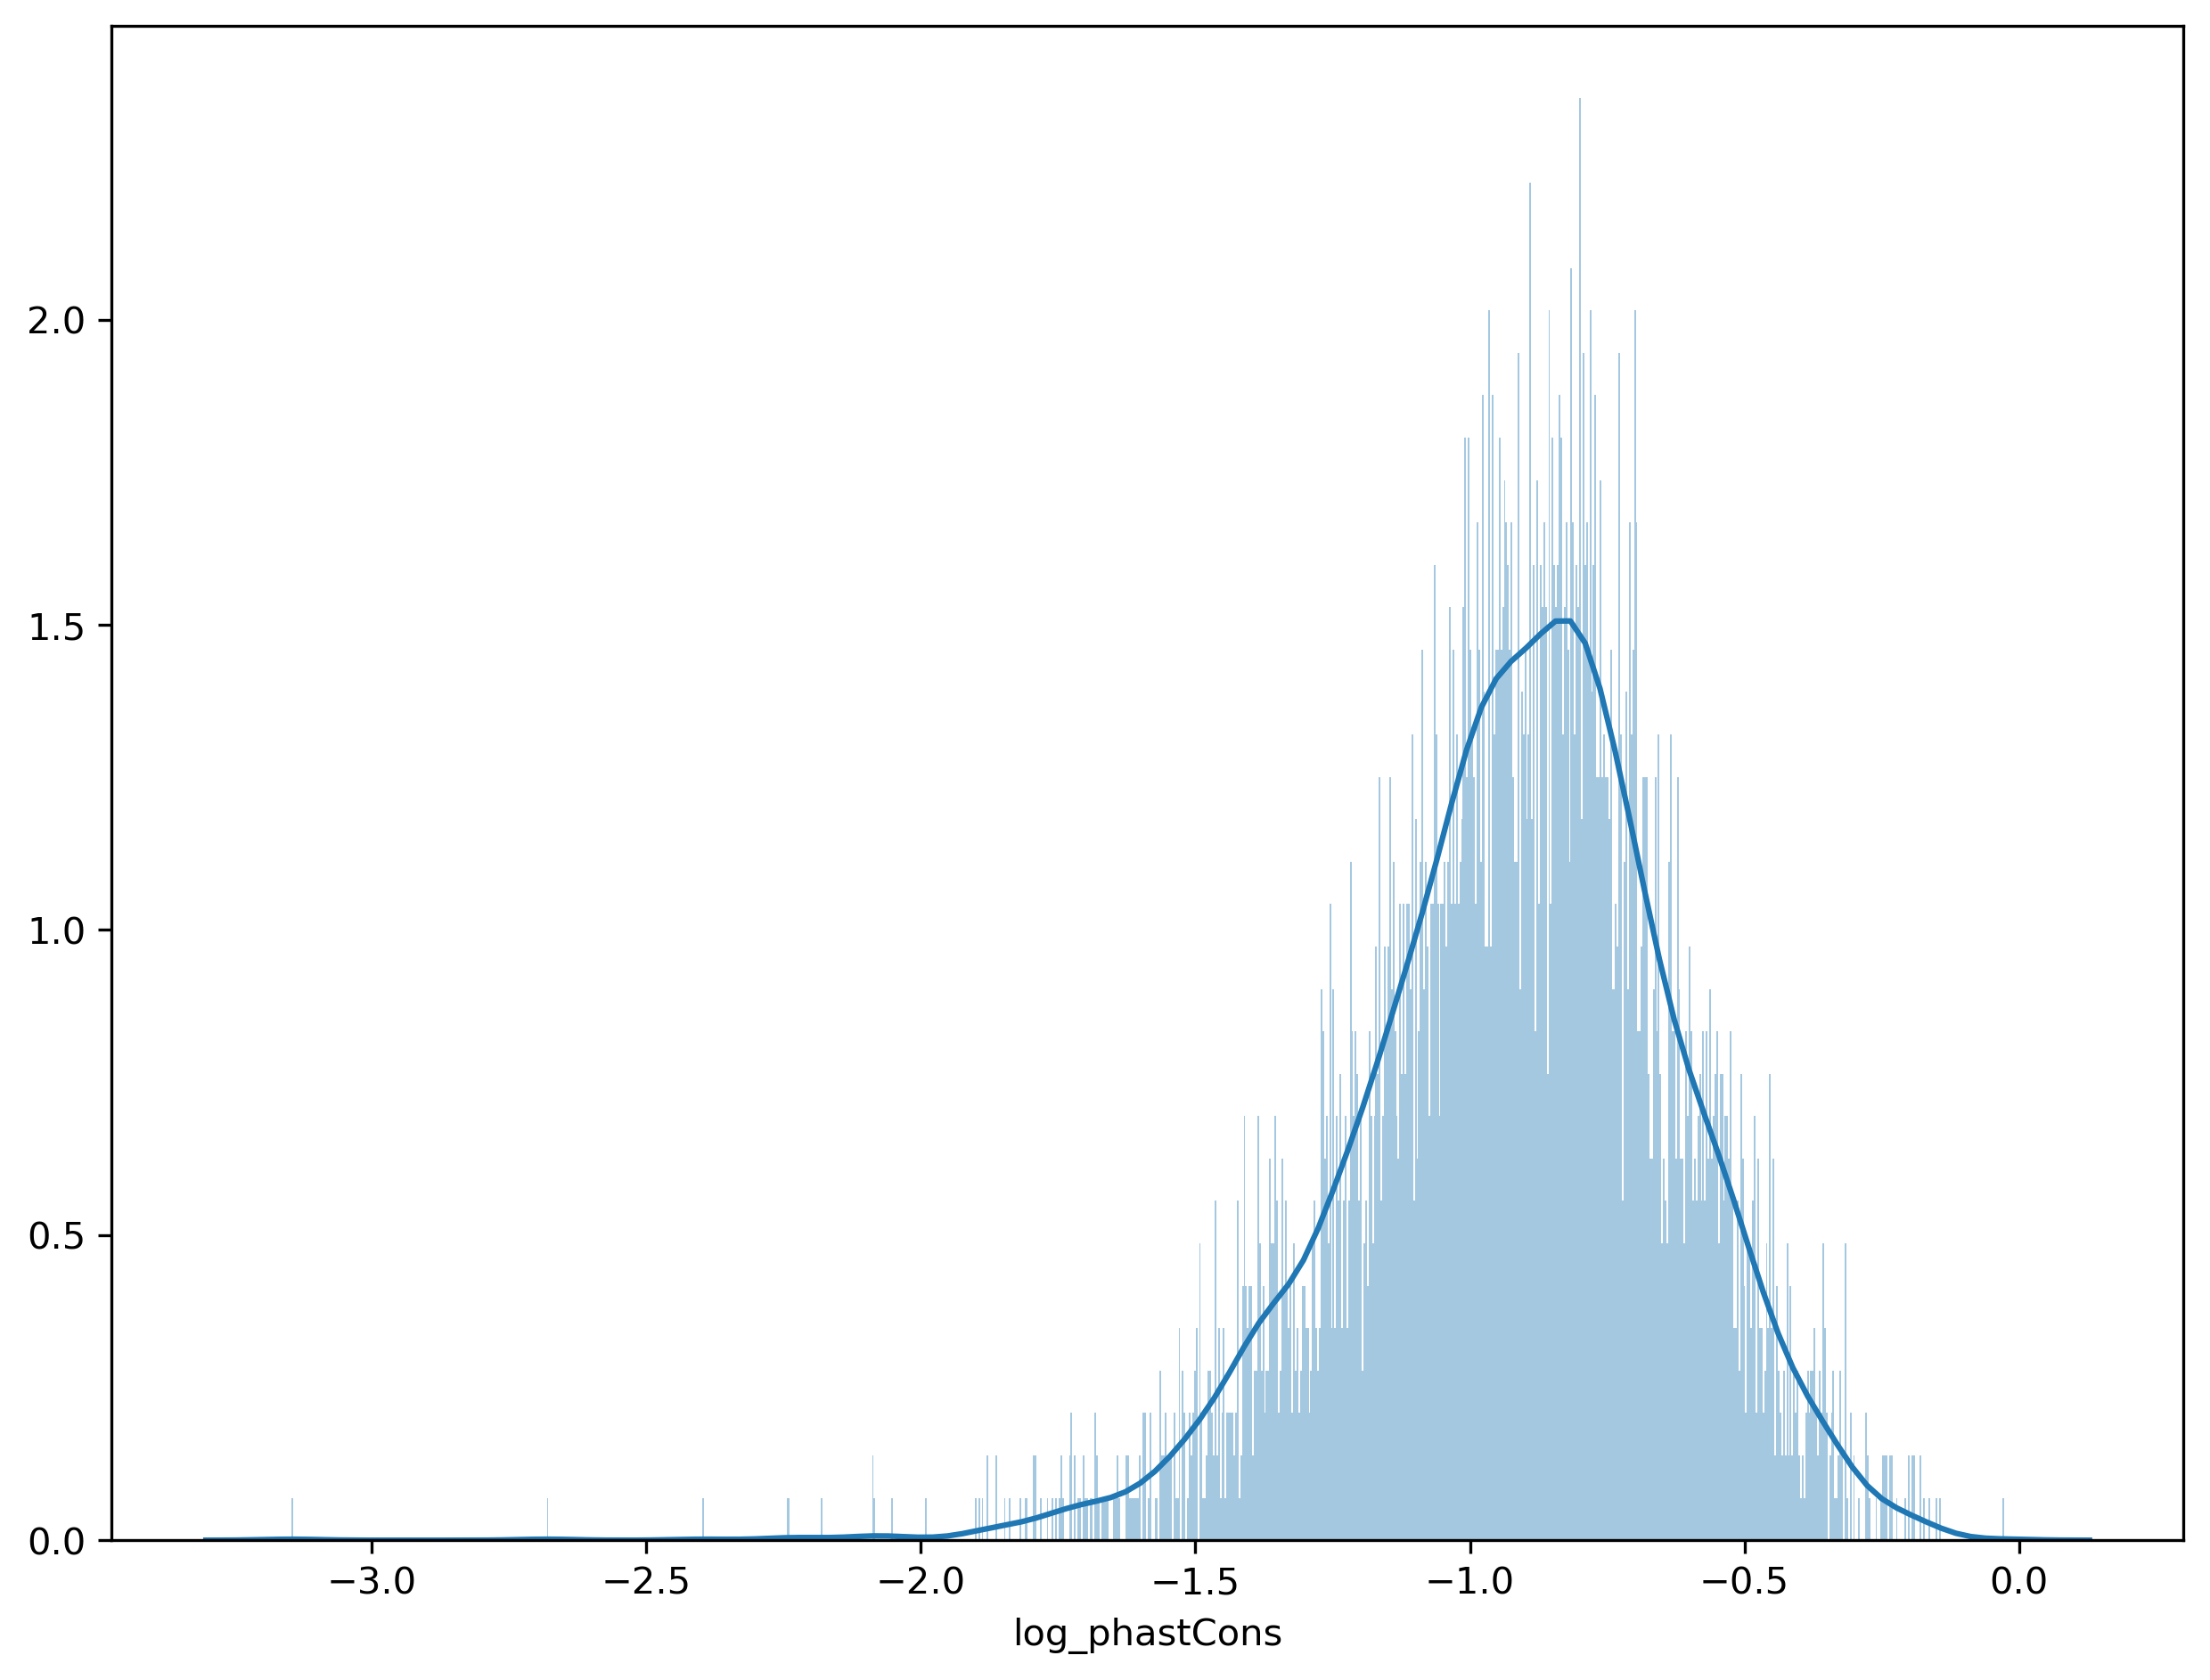

In [226]:
fig = plt.figure(figsize=(10,7.5))
ax = fig.add_subplot()
ax = sns.distplot(log_no_outlier_df[~log_no_outlier_df['Celltype'].isin(['Glia'])]['log_phastCons'],bins=1000)
# _=ax.set(xscale='log')
plt.show()

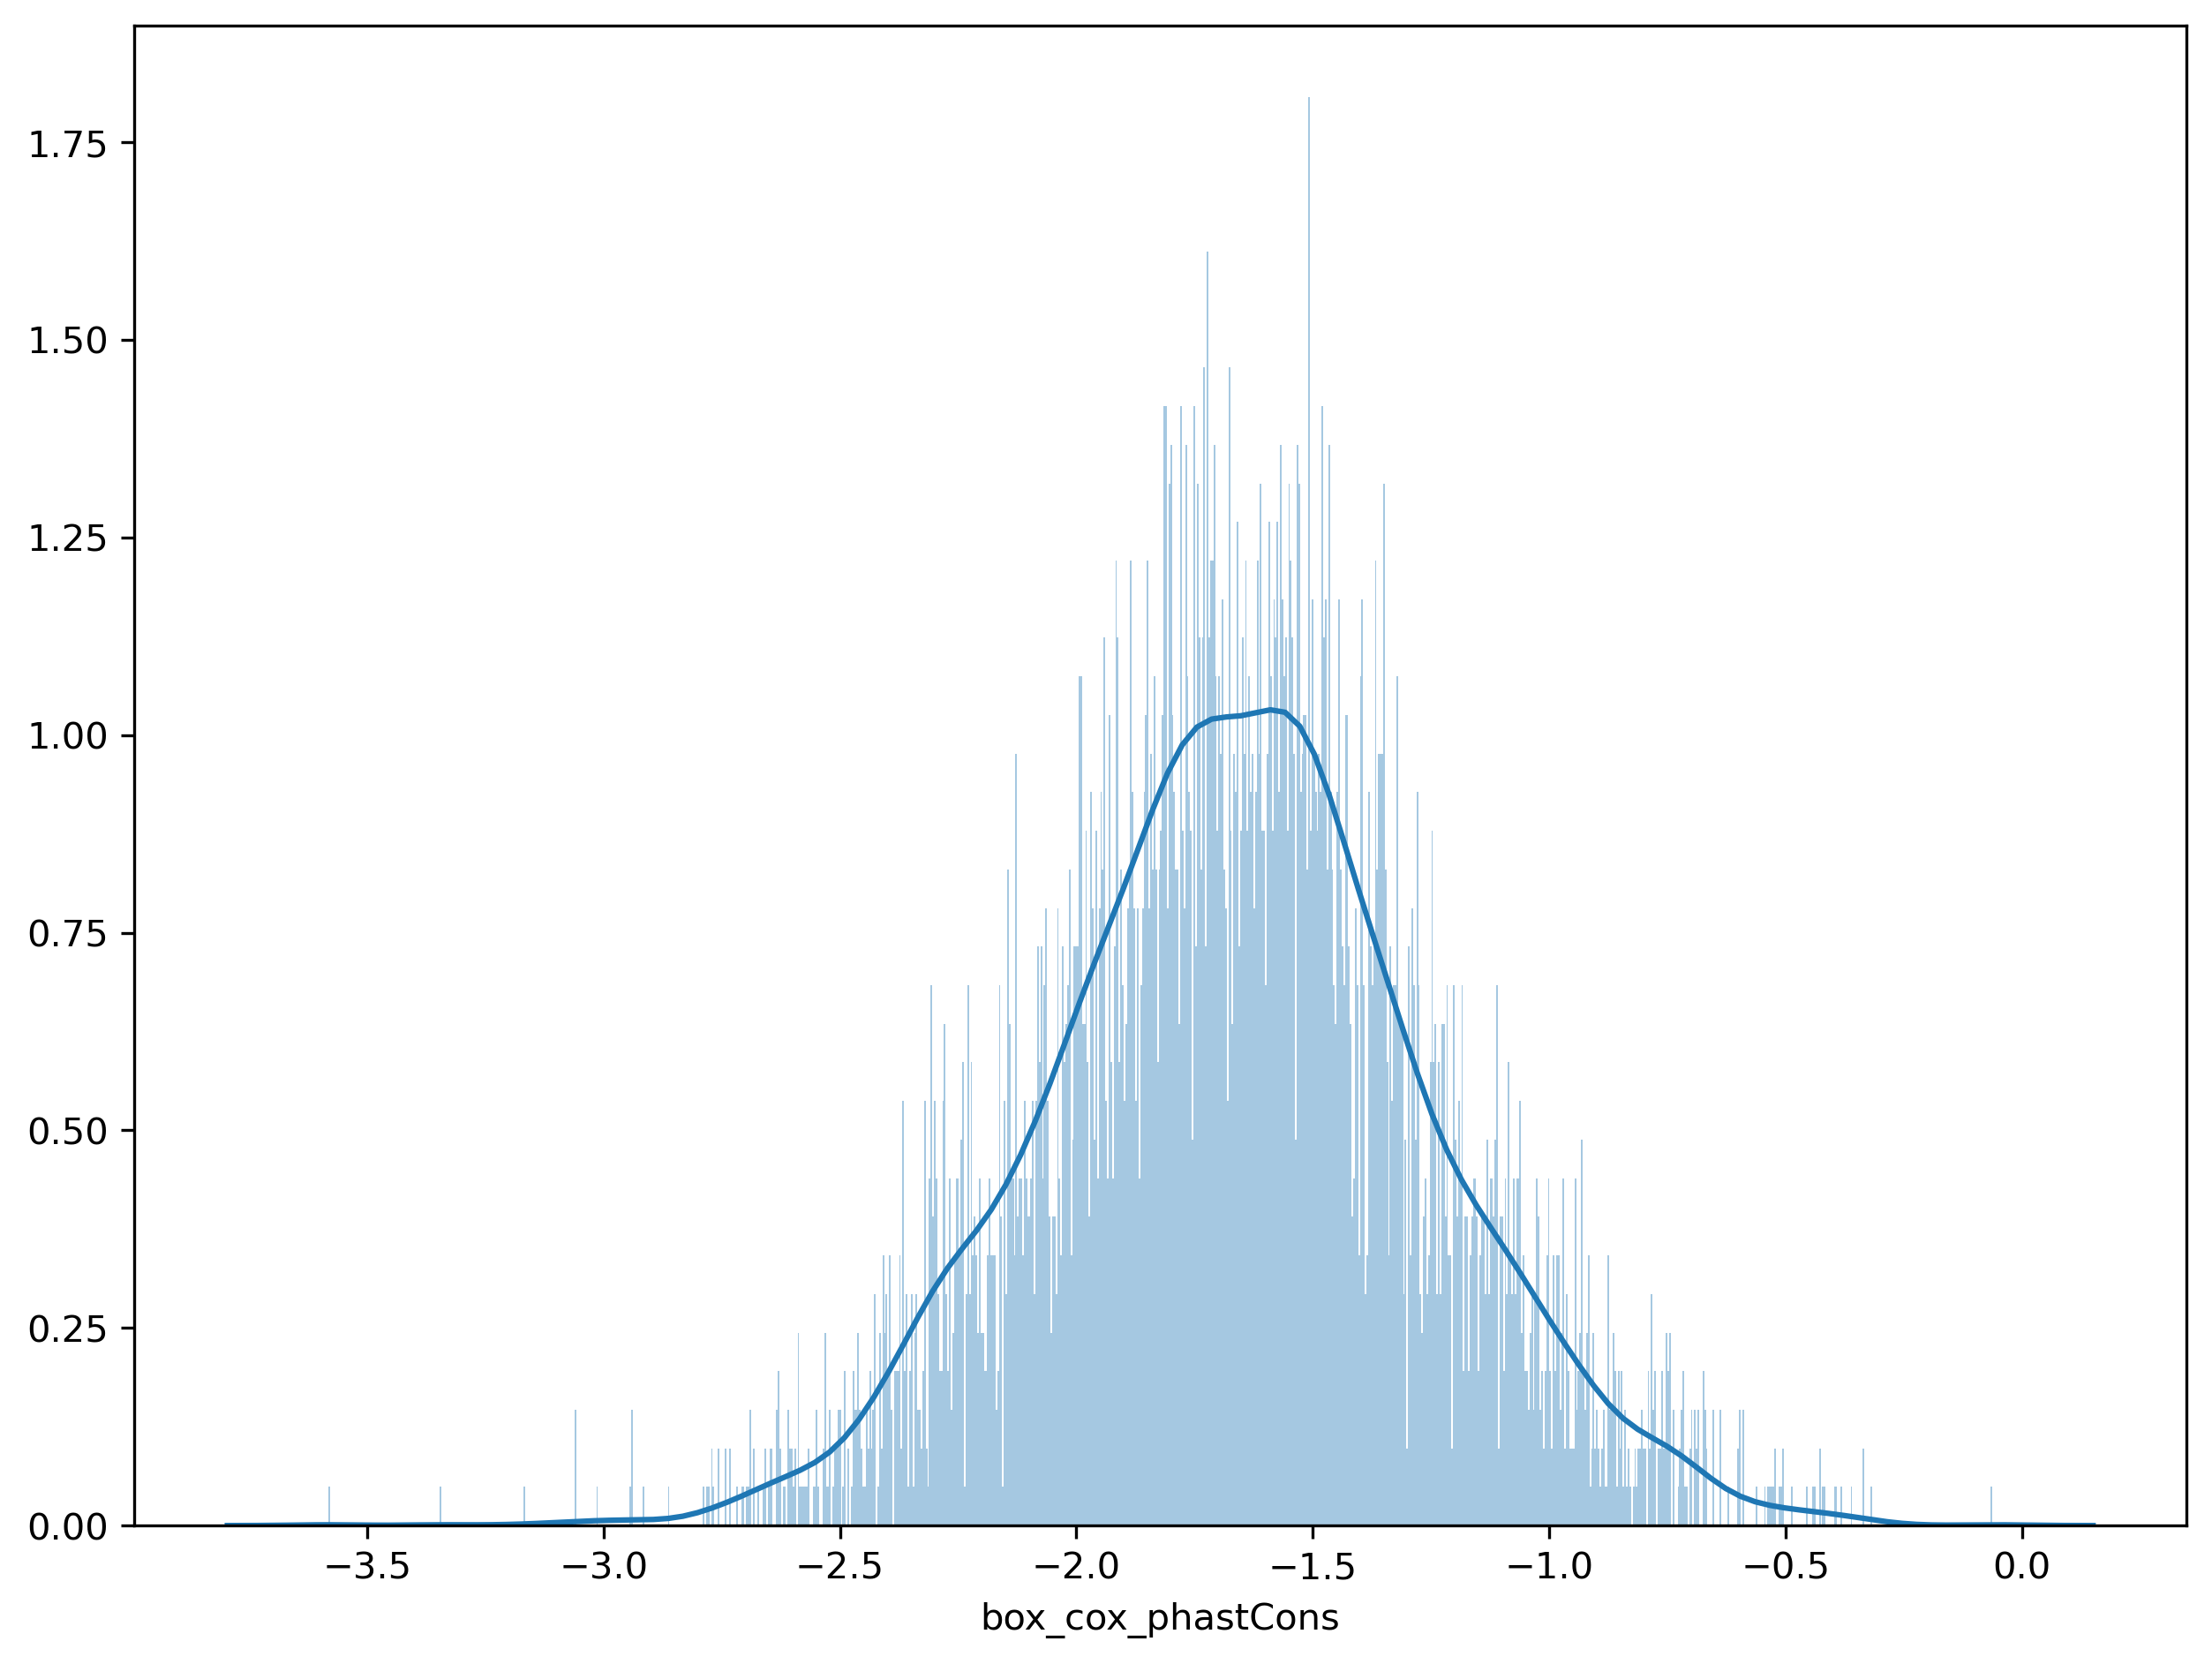

In [219]:
fig = plt.figure(figsize=(10,7.5))
ax = fig.add_subplot()
ax = sns.distplot(log_no_outlier_df['box_cox_phastCons'],bins=1000)
# _=ax.set(xscale='log')
plt.show()

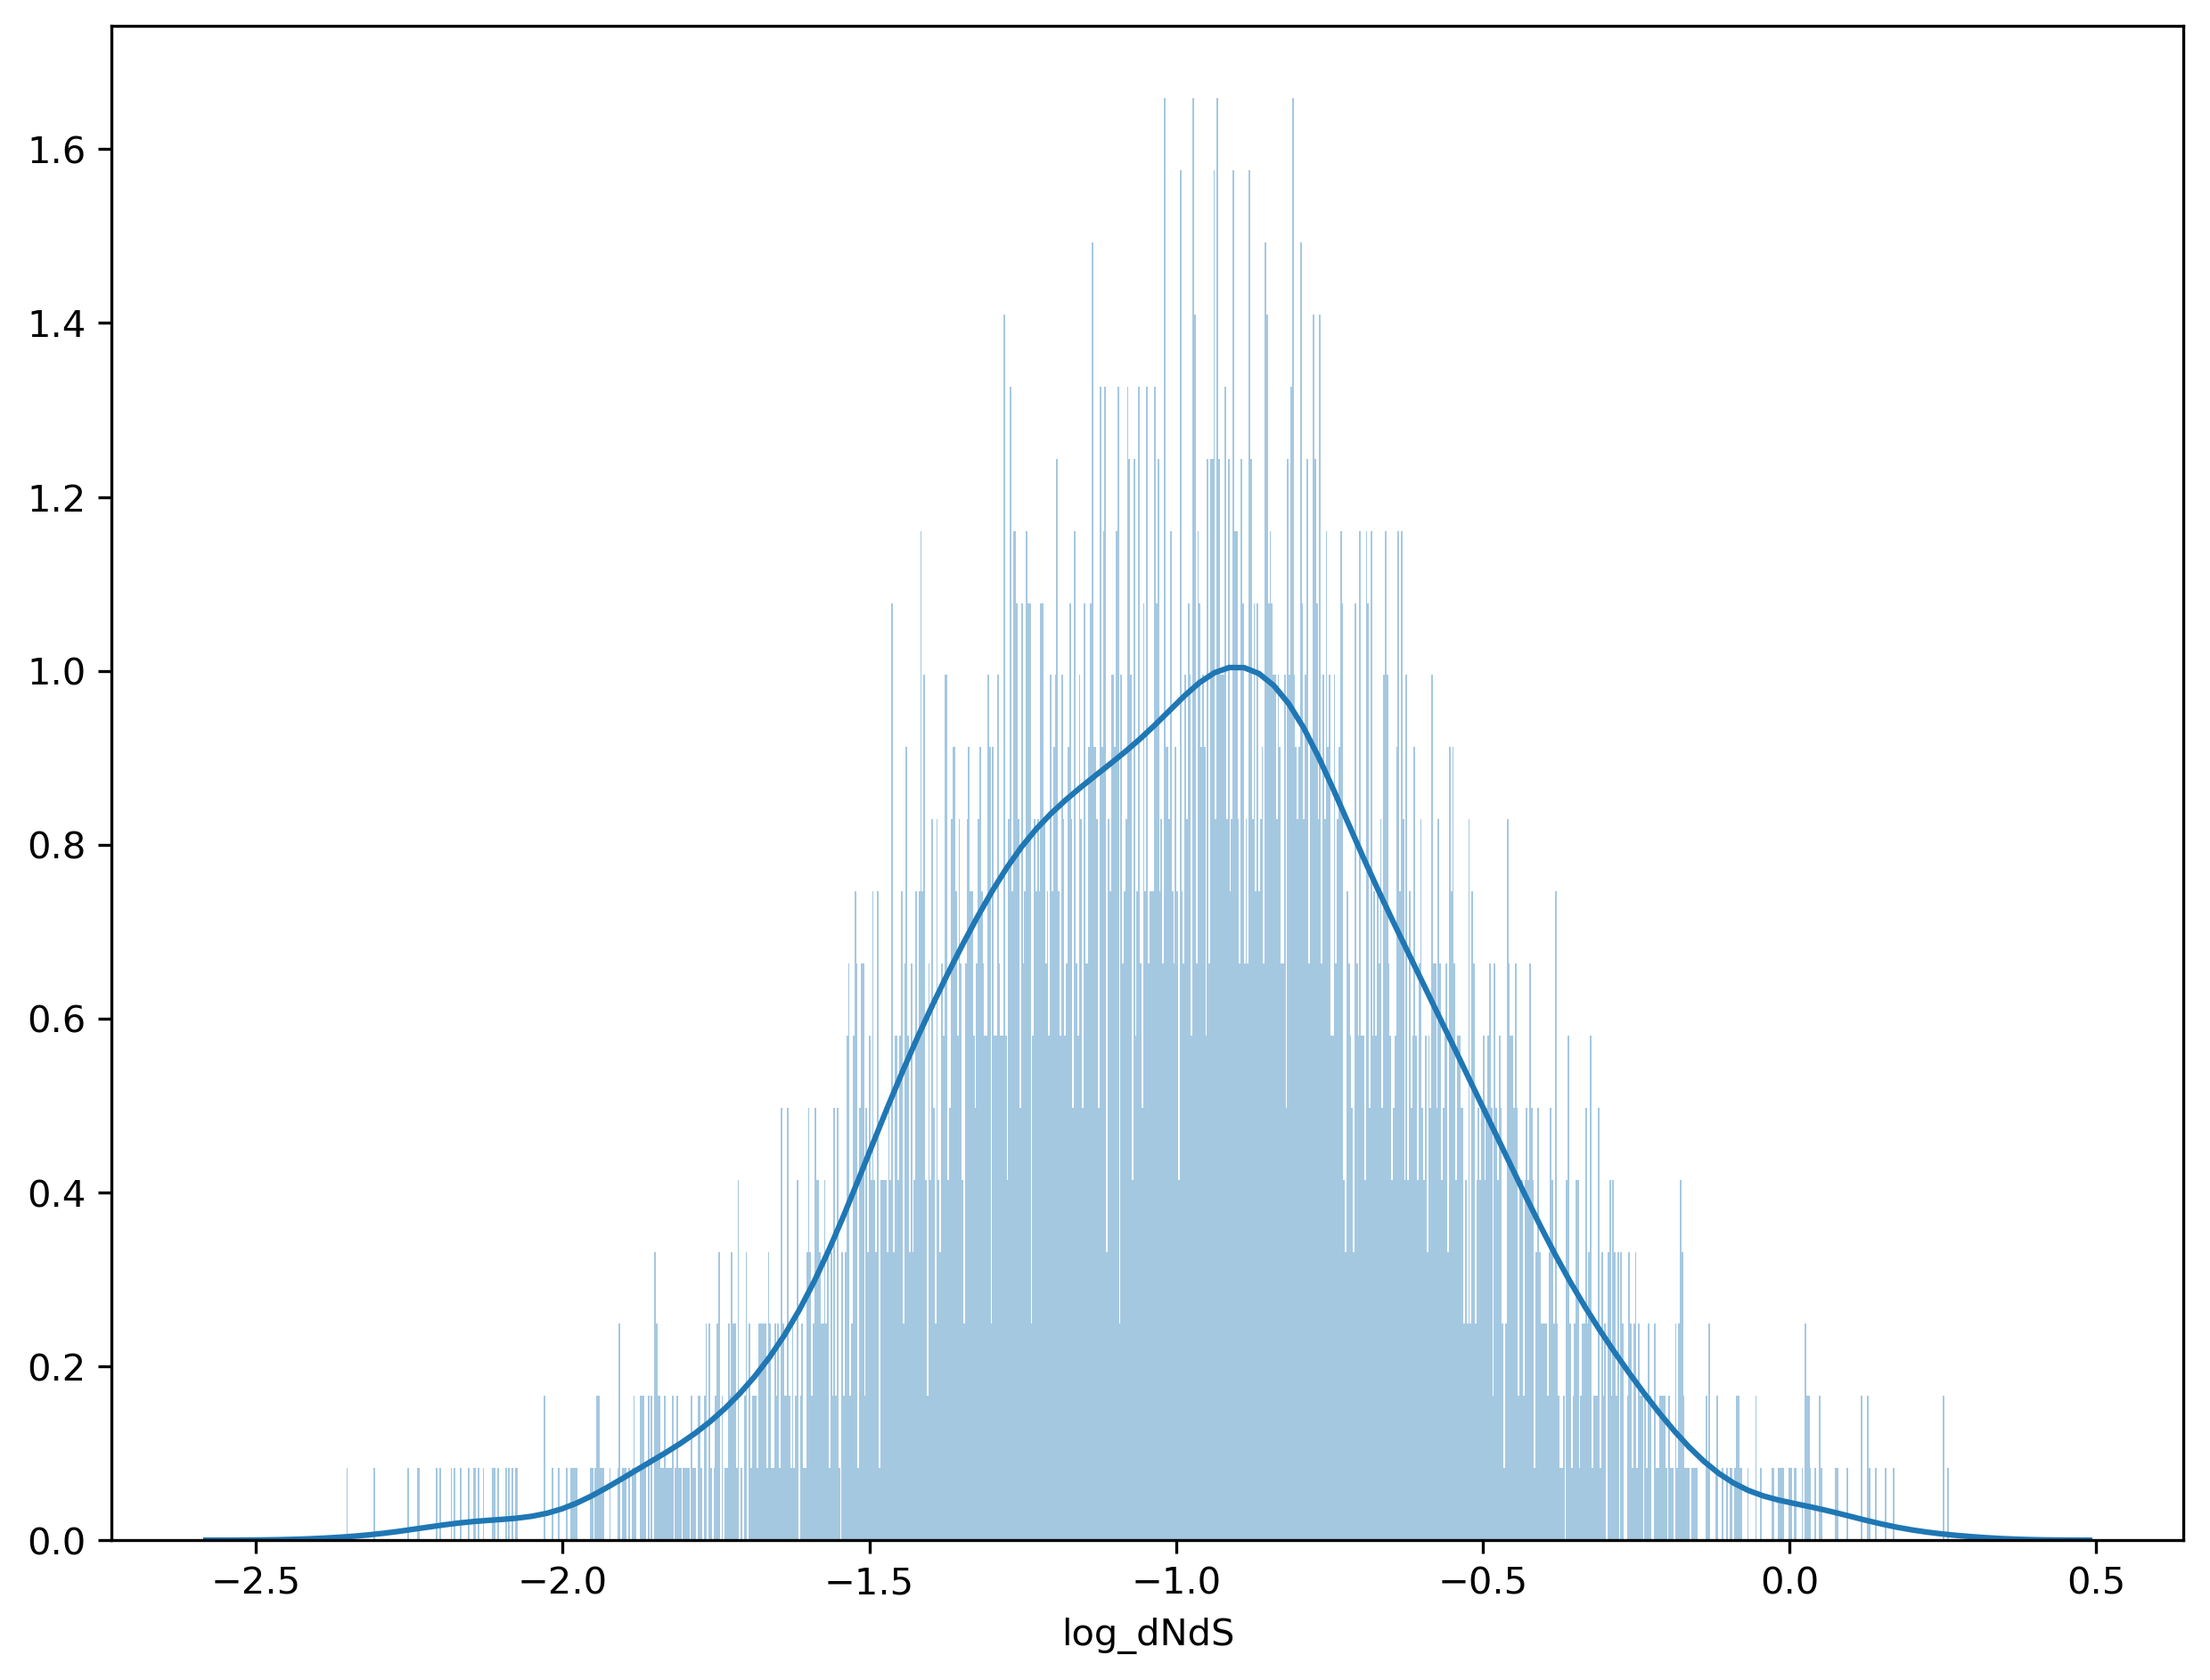

In [225]:
fig = plt.figure(figsize=(10,7.5))
ax = fig.add_subplot()
ax = sns.distplot(log_no_outlier_df[~log_no_outlier_df['Celltype'].isin(['Glia'])]['log_dNdS'],bins=1000)
# _=ax.set(xscale='log')
plt.show()

We can see that after log transformation both phastCons scores and dN/dS ratios are normally distributed. 

### Linear Regression with log transformed data

In [224]:
y, x = patsy.dmatrices('log_phastCons ~ log_dNdS', 
                       log_no_outlier_df[~log_no_outlier_df['Celltype'].isin(['Glia'])])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_phastCons   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     37.04
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           1.25e-09
Time:                        15:07:51   Log-Likelihood:                -792.35
No. Observations:                4615   AIC:                             1589.
Df Residuals:                    4613   BIC:                             1602.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9800      0.011    -85.413      0.0

### Plotting a dot plot between phastCons and dN/dS for each cell type

In [97]:
import seaborn as sns

[None, None]

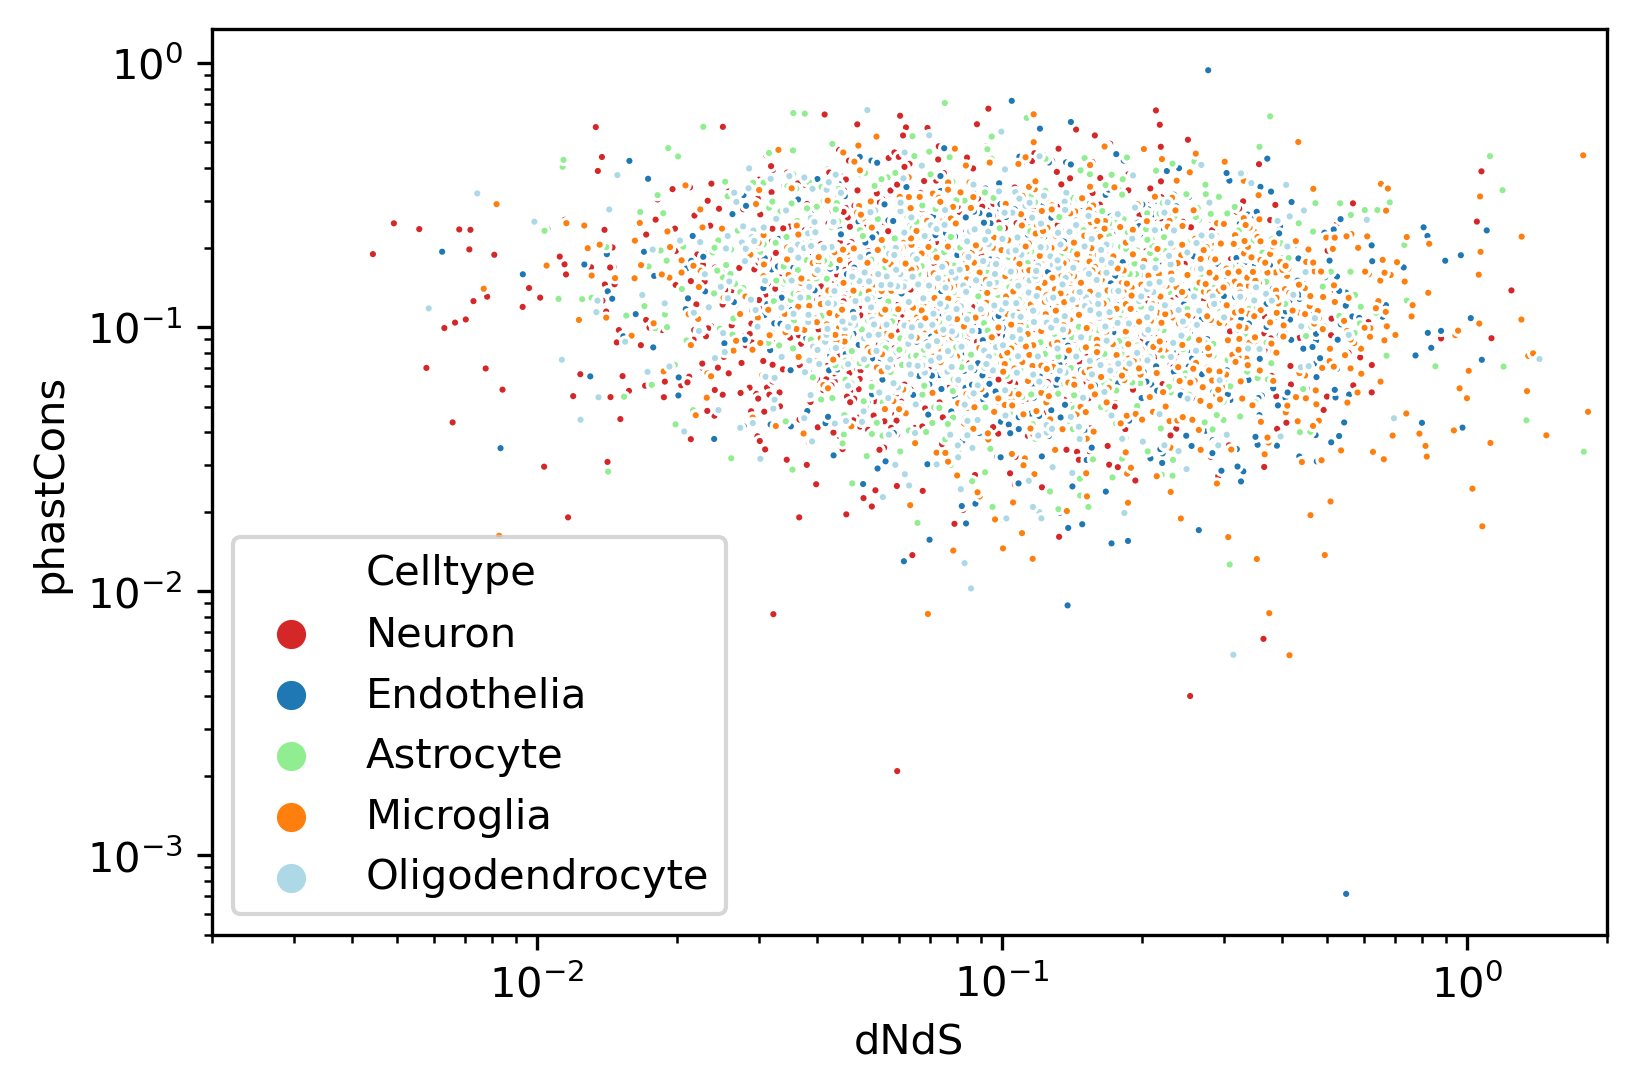

In [116]:
palette={'Endothelia':'tab:blue','Glia':'tab:green','Neuron':'tab:red','Oligodendrocyte':'lightblue','Astrocyte':'lightgreen','Microglia':'tab:orange'}
g=sns.scatterplot(data=all_df[all_df['Celltype']!='Glia'],
                  x='dNdS',y='phastCons',hue='Celltype',
                  palette=palette,s=5)
g.set(xlim=(0.002,2))
g.set(xscale='log',yscale='log')

[None, None]

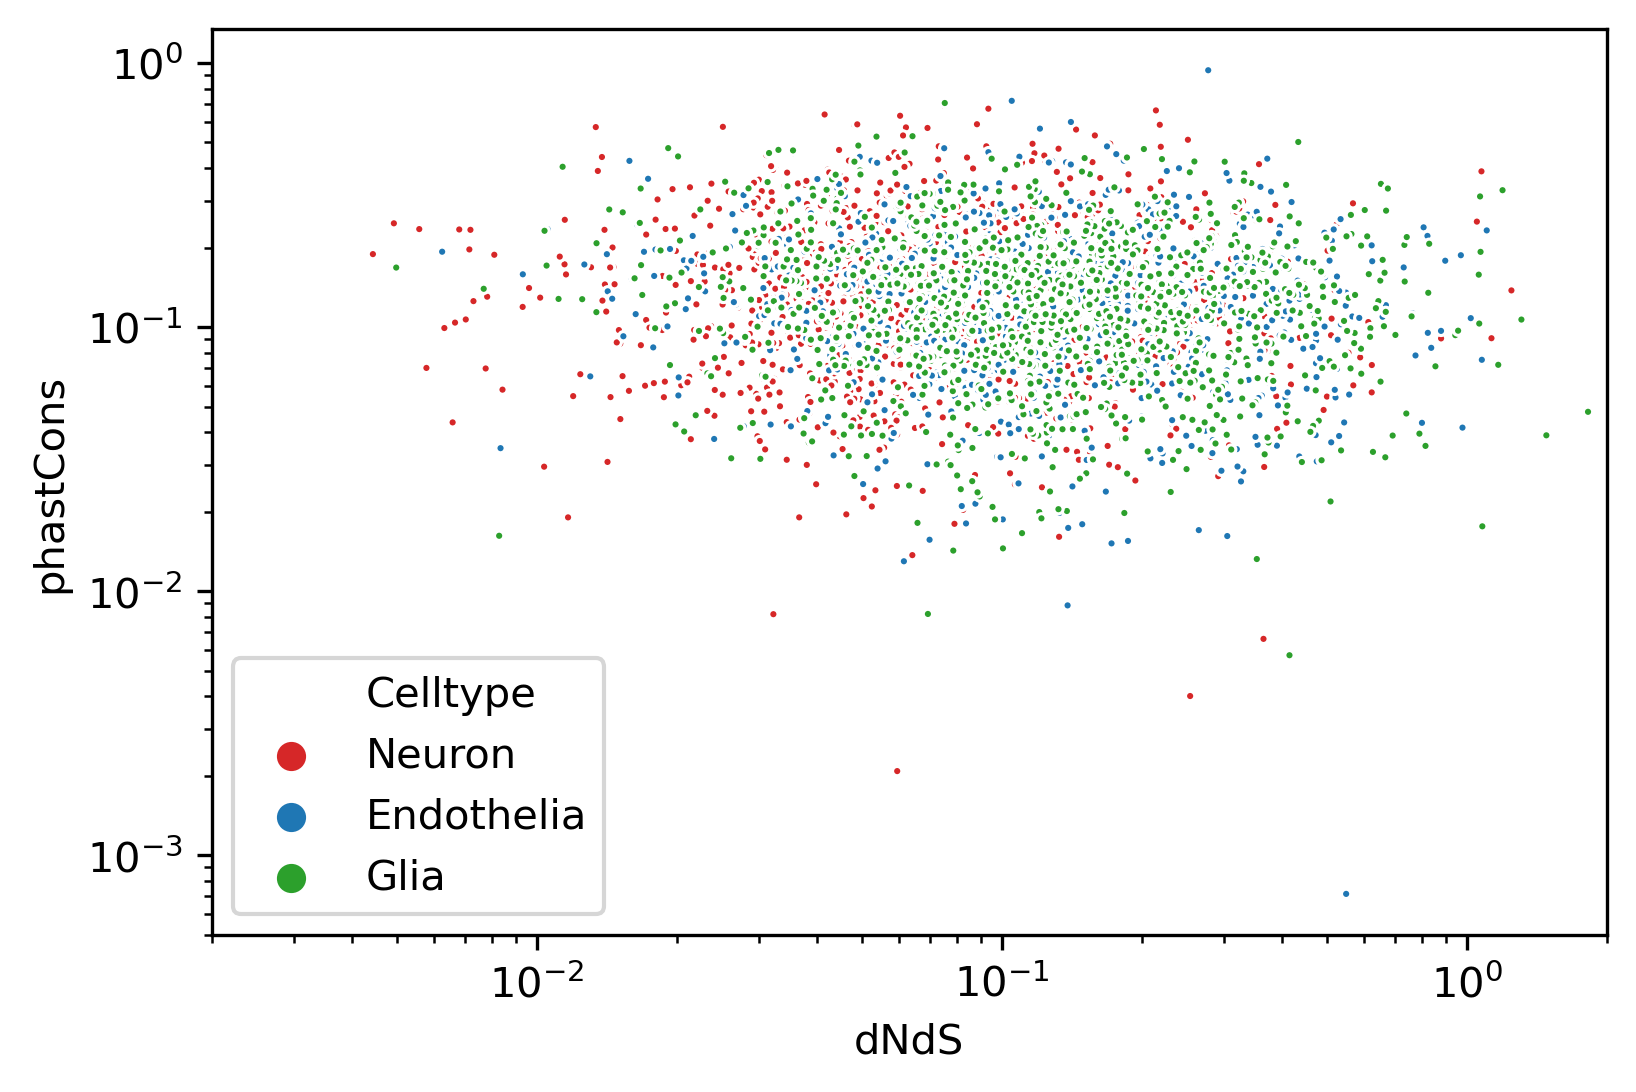

In [118]:
g=sns.scatterplot(data=all_df[all_df['Celltype'].isin(['Neuron','Glia','Endothelia'])],
                  x='dNdS',y='phastCons',hue='Celltype',
                  palette=palette,s=5)
g.set(xlim=(0.002,2))
g.set(xscale='log',yscale='log')

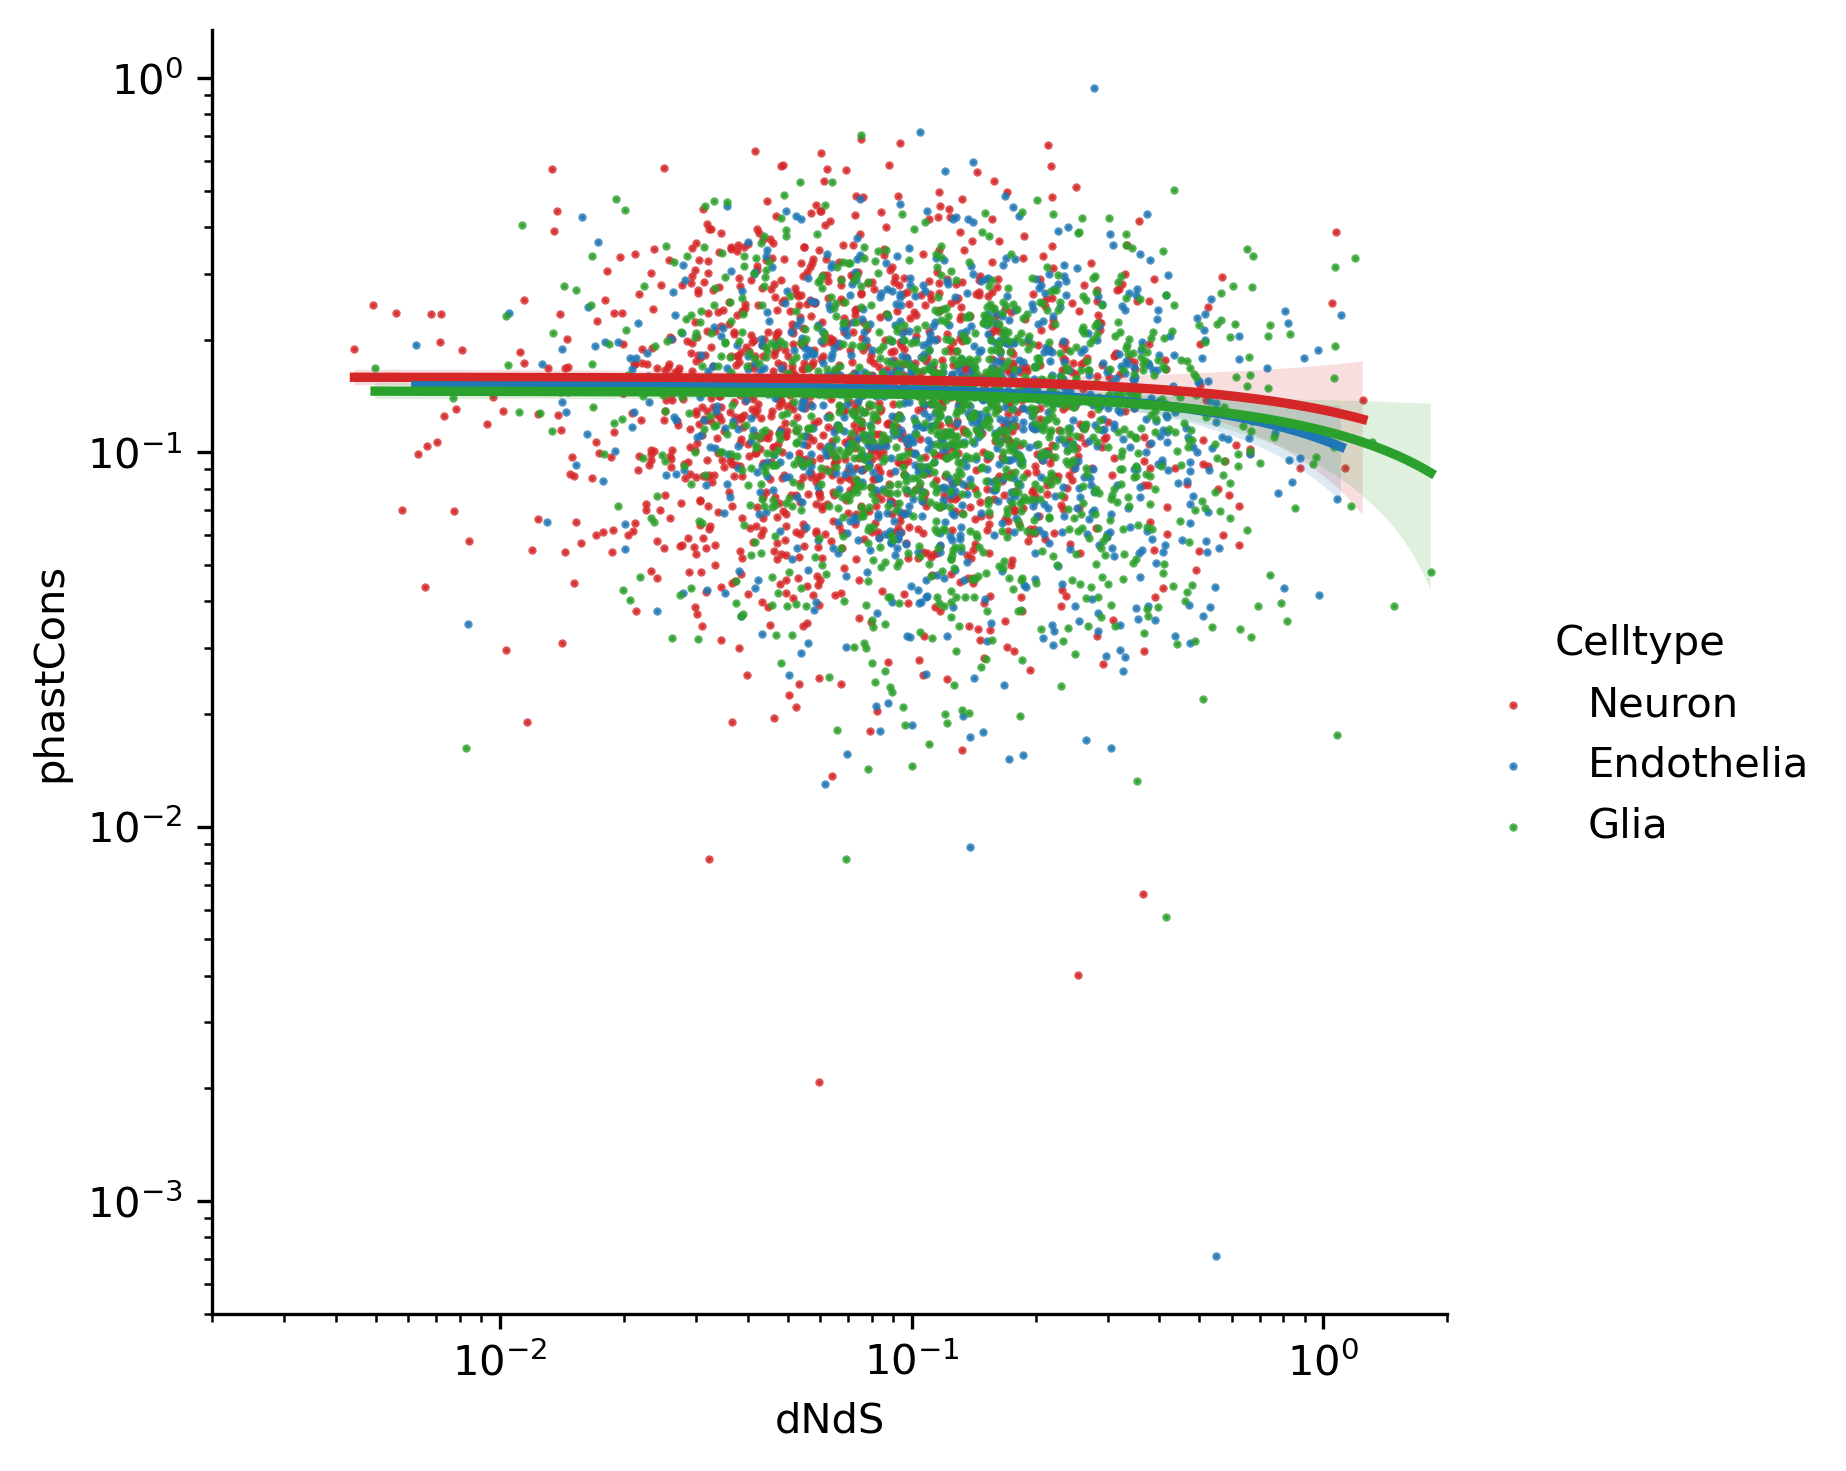

In [184]:
# fig, ax = plt.subplots(figsize=(10,7.5))
g=sns.lmplot(data=no_outlier_df[no_outlier_df['Celltype'].isin(['Neuron','Glia','Endothelia'])],
                  x='dNdS',y='phastCons',hue='Celltype',
                  palette=palette,scatter_kws={"s": 1})
g.set(xlim=(0.002,2))
g.set(xscale='log',yscale='log')
# plt.show()

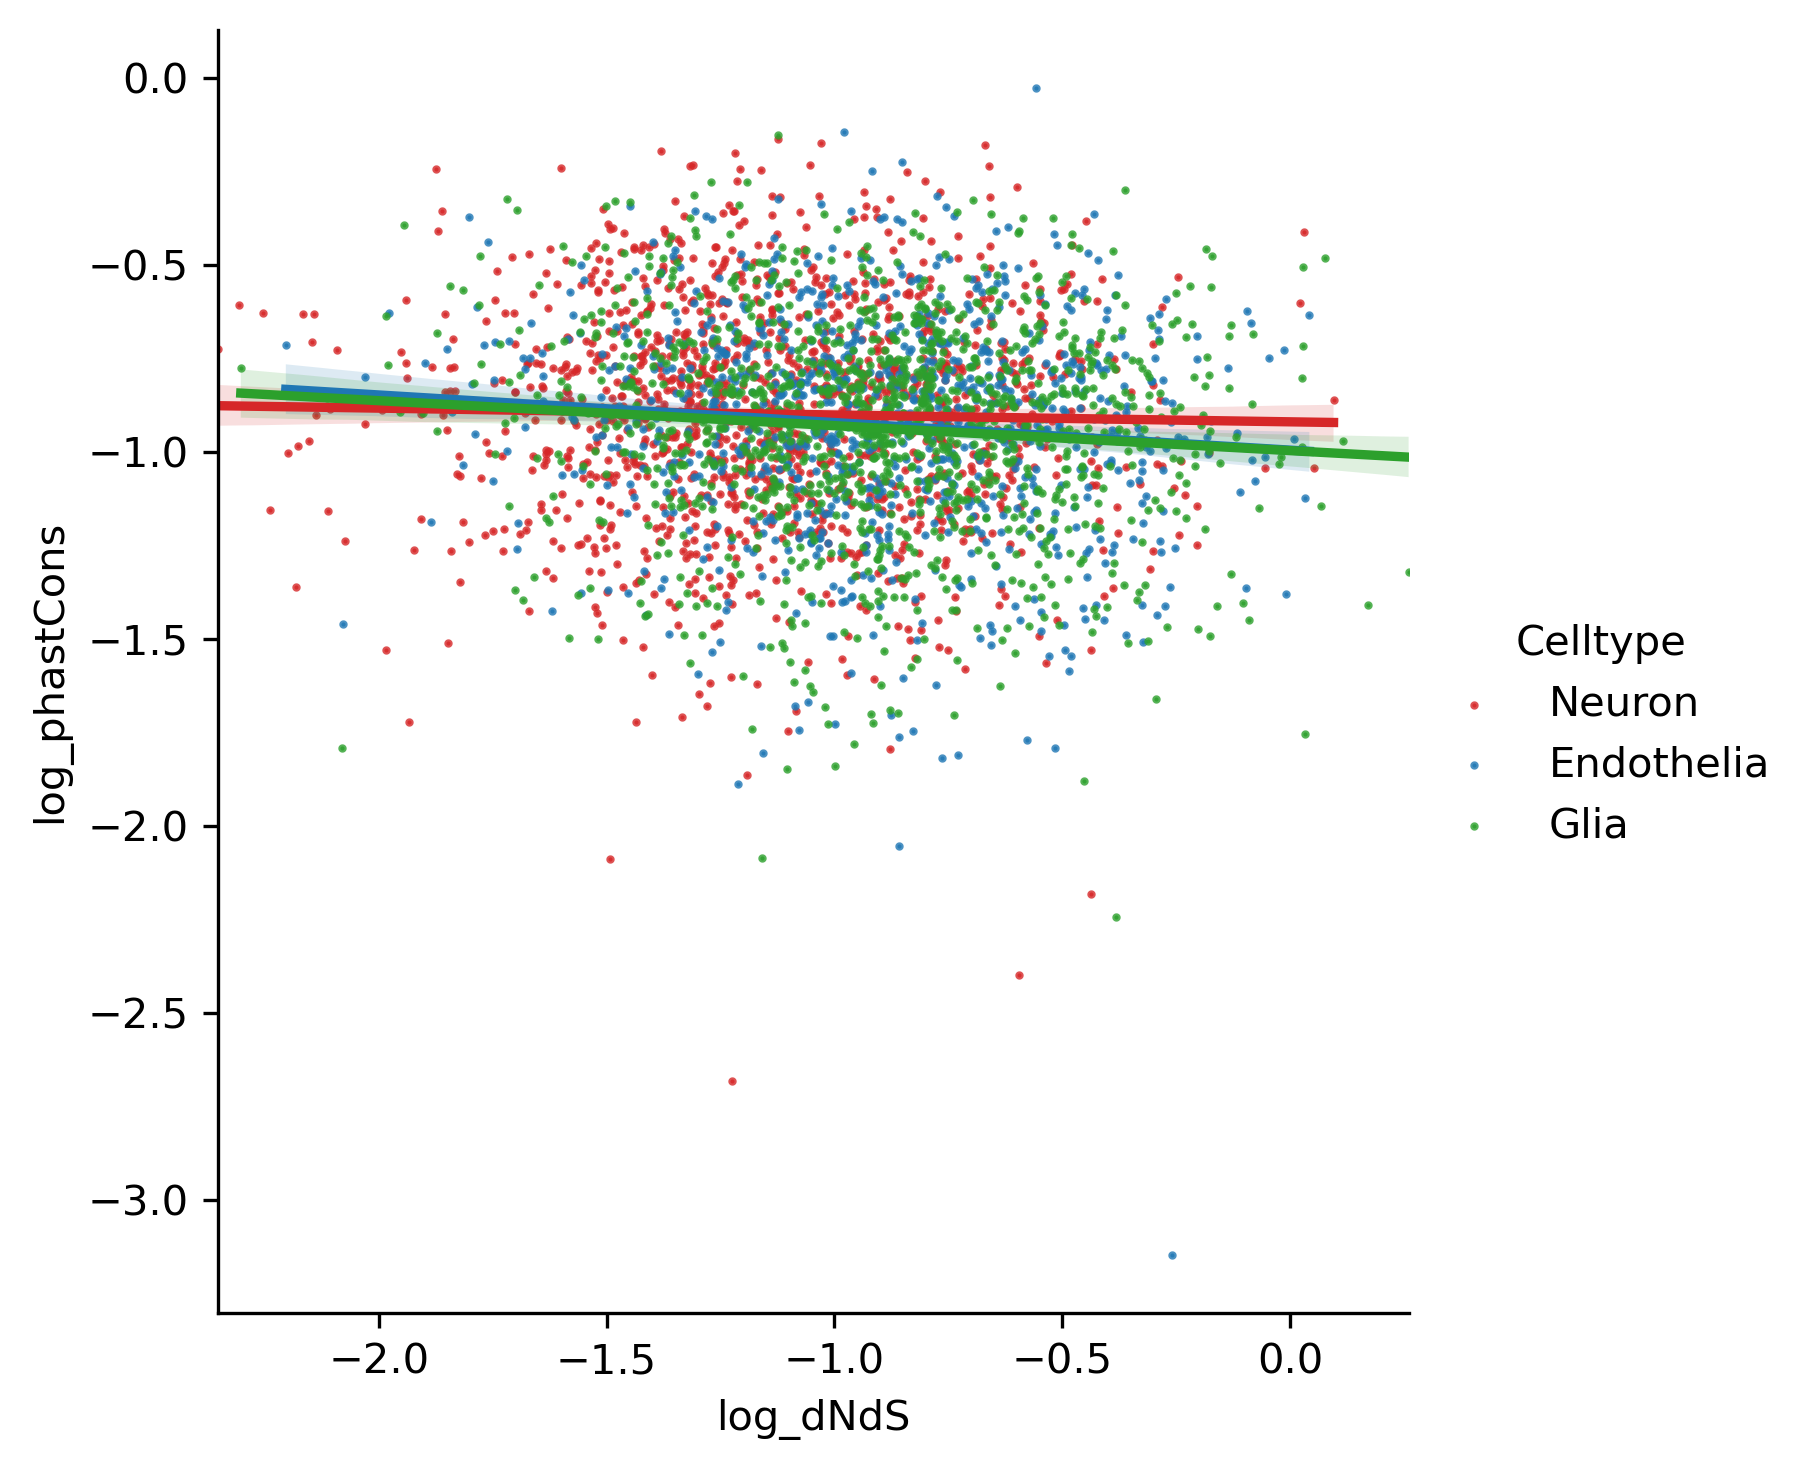

In [222]:
g=sns.lmplot(data=log_no_outlier_df[log_no_outlier_df['Celltype'].isin(['Neuron','Glia','Endothelia'])],
                  x='log_dNdS',y='log_phastCons',hue='Celltype',
                  palette=palette,scatter_kws={"s": 1})

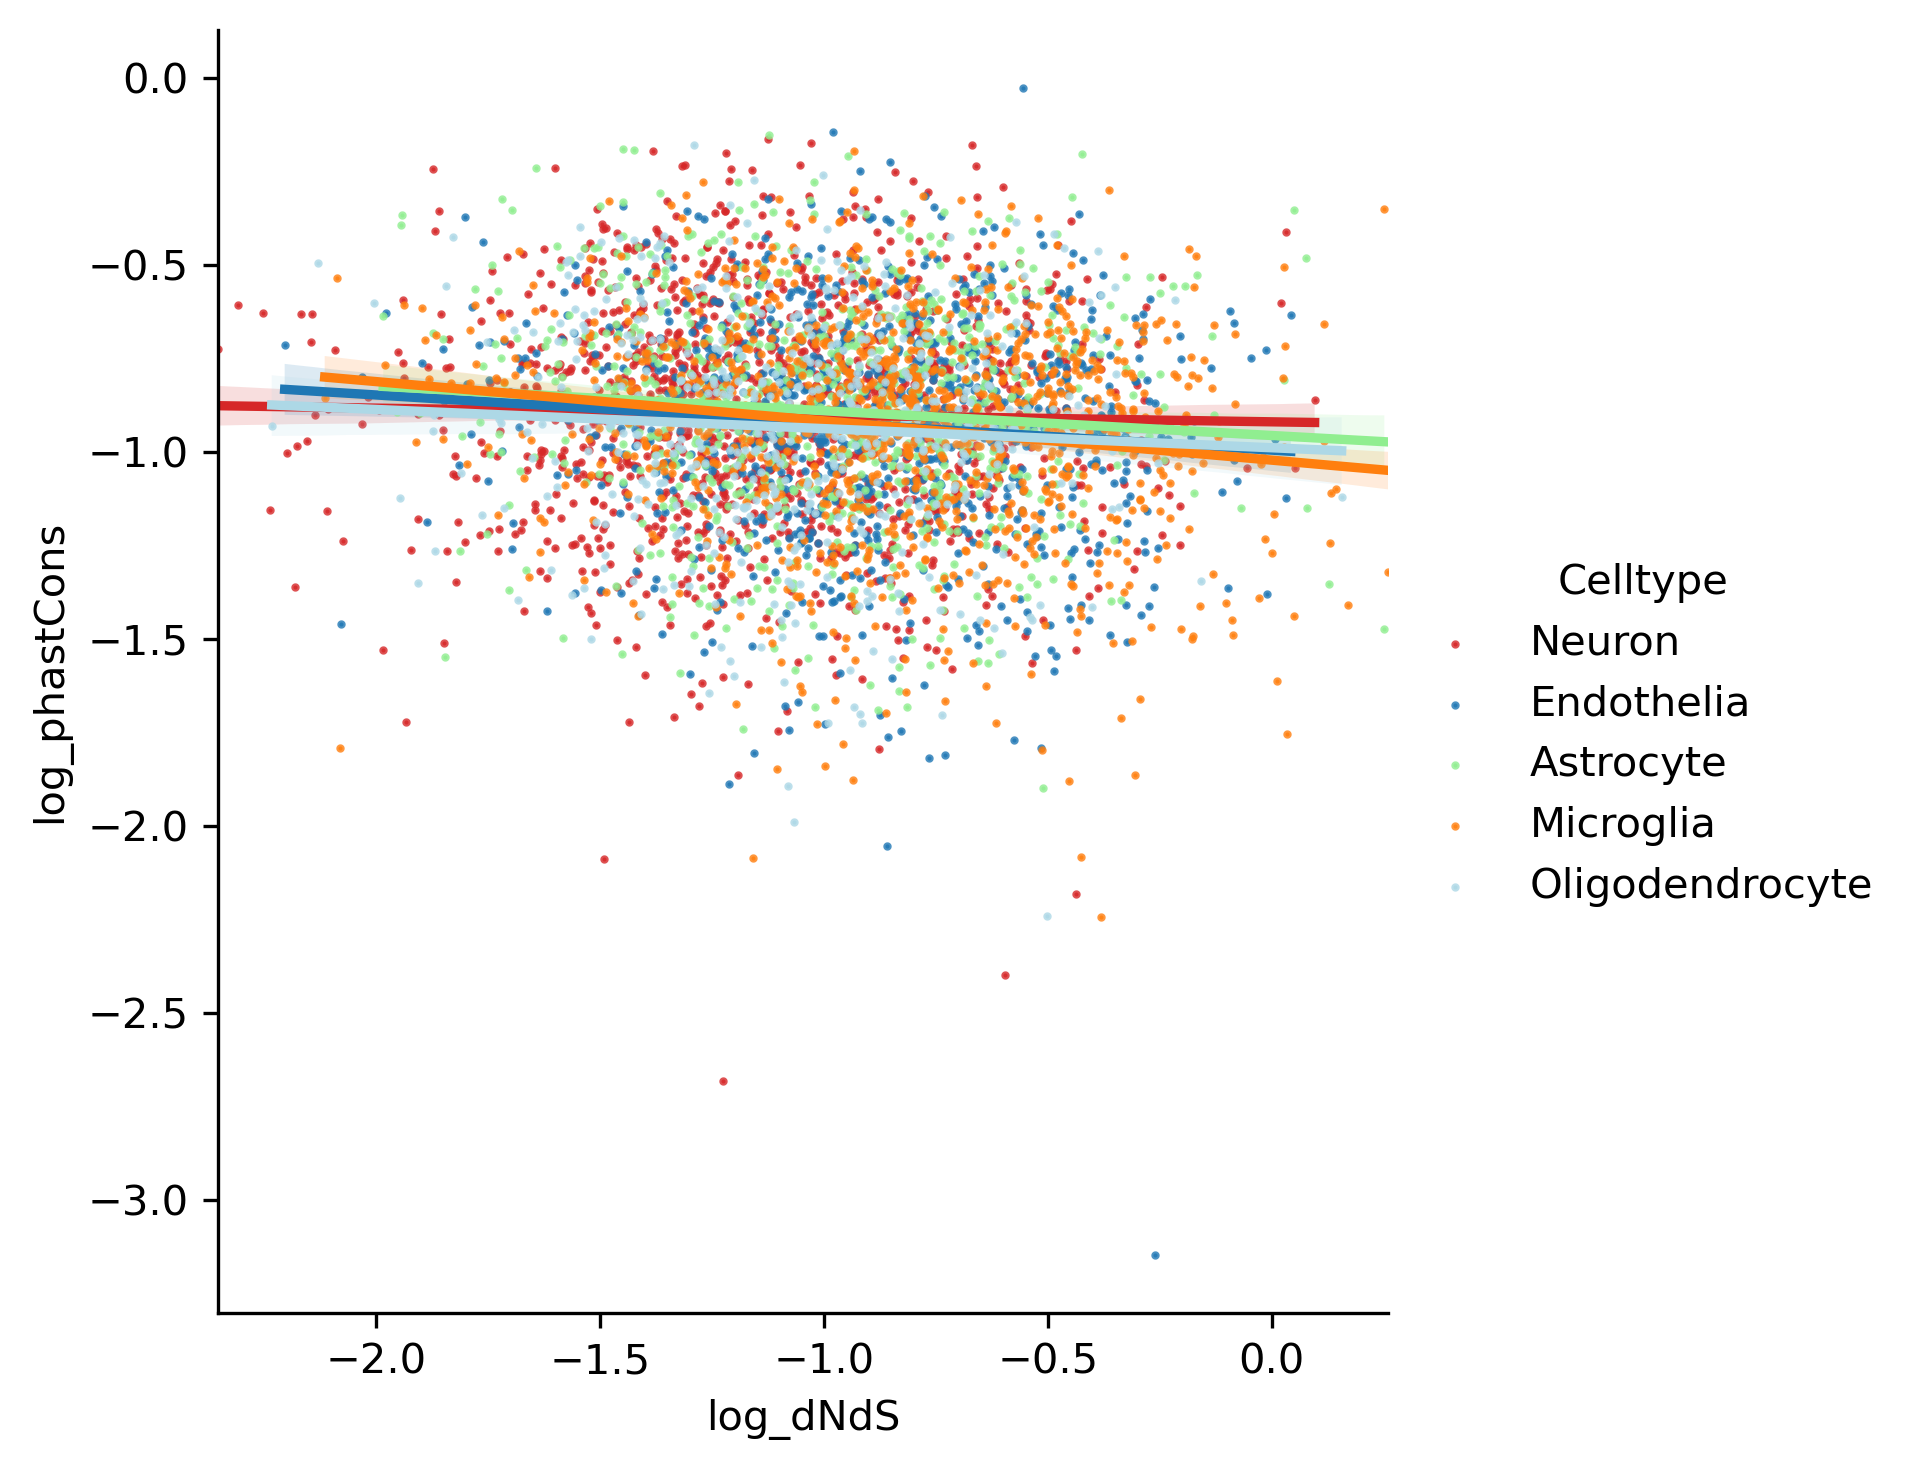

In [231]:
g=sns.lmplot(data=log_no_outlier_df[~log_no_outlier_df['Celltype'].isin(['Glia'])],
                  x='log_dNdS',y='log_phastCons',hue='Celltype',
                  palette=palette,scatter_kws={"s": 1})

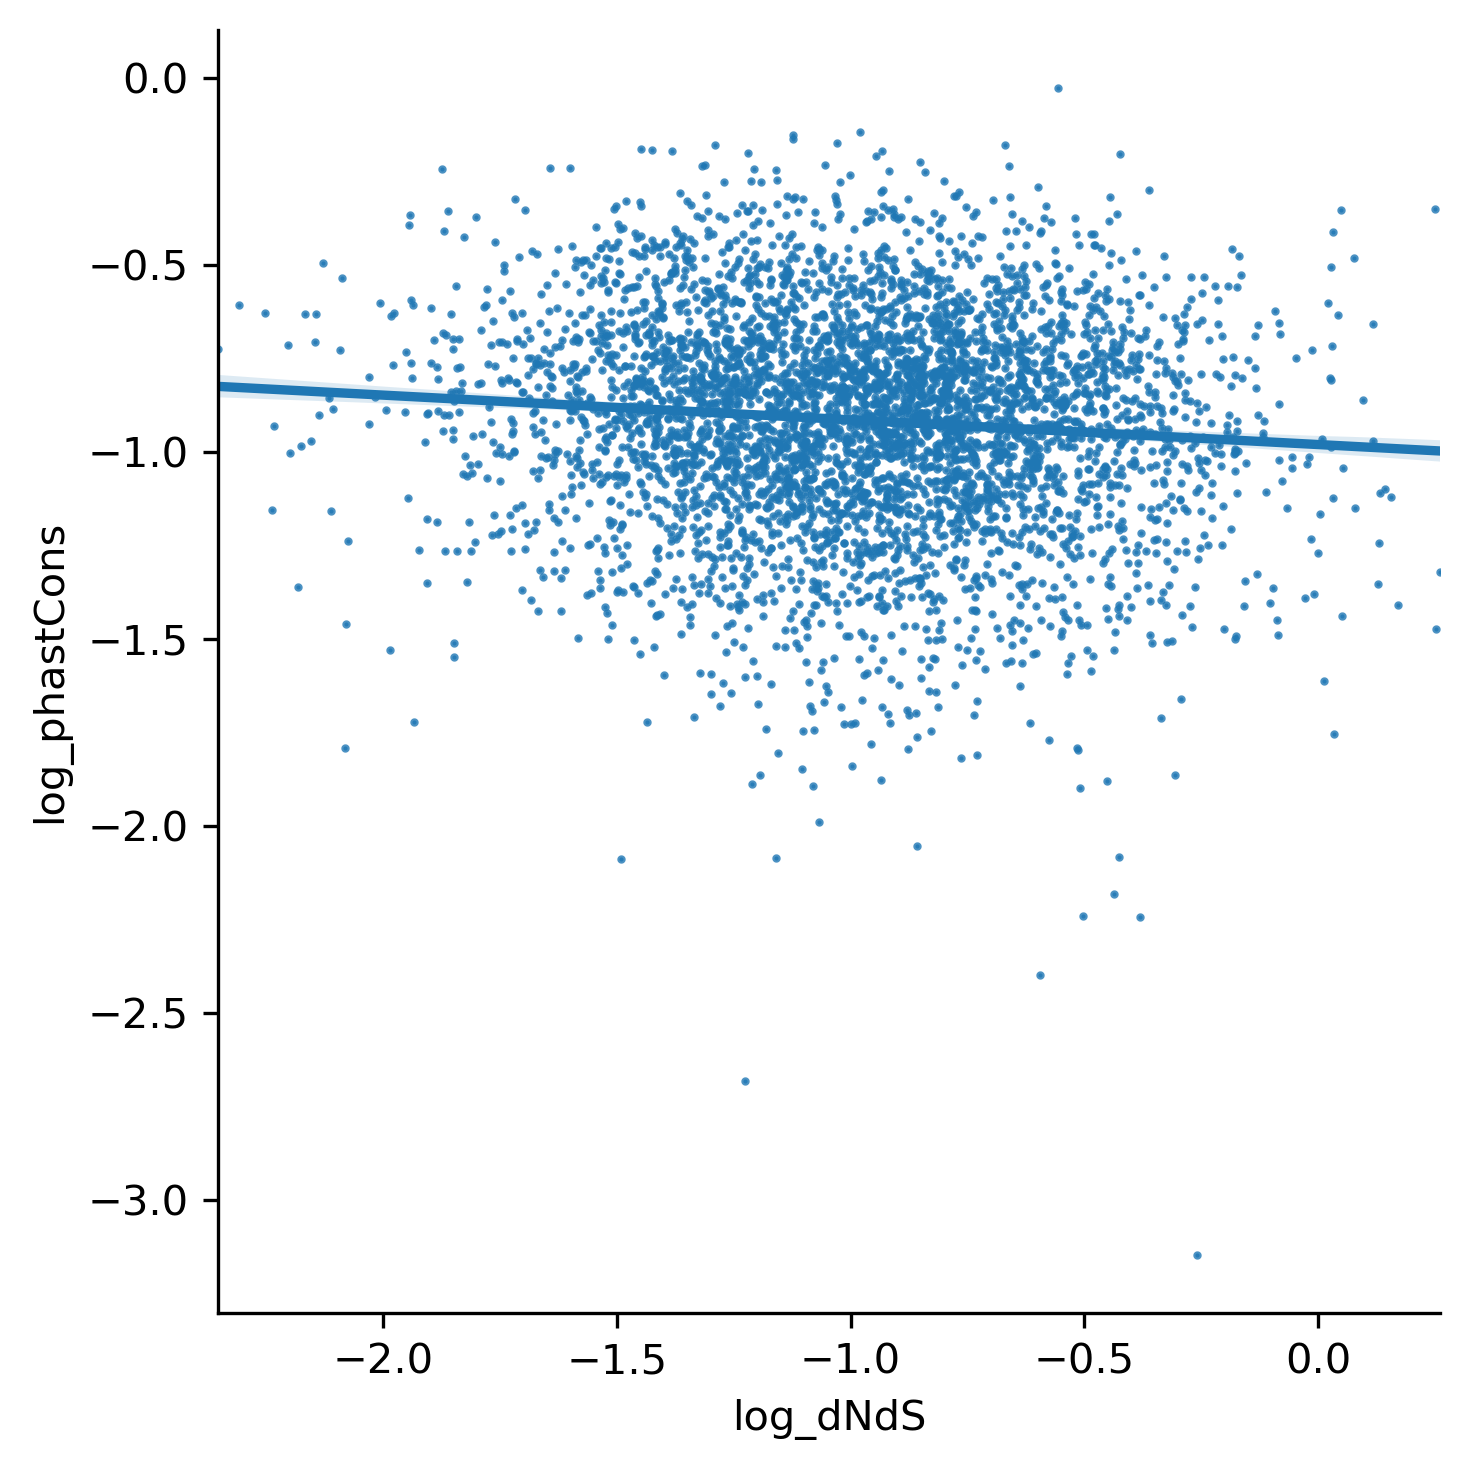

In [223]:
g=sns.lmplot(data=log_no_outlier_df[~log_no_outlier_df['Celltype'].isin(['Glia'])],
                  x='log_dNdS',y='log_phastCons',scatter_kws={"s": 1})